# Just indicate the test ratio you would like in this cell and run all the cells to obtain a train and test dataset with names dataset_train_{100.ratio}.csv and dataset_test_{100.ratio}.csv

In [4]:
test_ratio=0.085

## Data description<a name="1.1"></a>

- This contains movies from TMBD(The Movie Database) from the year 1961. It contains 21 relevant attributes. 


### Attribute information:

##### Movie data
    1. ID: Movie ID
    2. Popularity: Popularity score
    3. Budget: Amount spent to make the movie
    4. Revenue: Amount realized from the movie
    5. original title: Movie title
    6. Cast: Actors & Actresses in the movie
    7. Homepage: Movie website
    8. Director: Director(s) of the movie
    9. Tagline: Catchphrase(s)/slogan of the movie
    10. keywords: Words associated with a movie
    11. Overview: Movie Summary
    12. Runtime: length of a movie
    13. Genres: Category
    14. Production companies: Companies that produced the movie
    15. Release date: Date movie was released
    16. Vote count: number of votes
    17. Vote average: average score of votes
    18. Release year: year movie was released
    19. Budget adj: Budget In terms of 2010 dollars
    20 Revenue adj: Revenue in terms of 2010 dollars

##### output variable (desired target):
    21. Profit -  Revenue minus Budget
    
## Problem statement and objective
This is a classification task where we want to predict whether a movie will make profit based on the primary properties of the movie : Budget, Original Title, Cast, Director, Keywords, Overview, Runtime, Genres, Production Companies, Release Date, popularity, vote counts and vote average. We will omit factors directly related to profit like revenue. 

In [5]:
# import libraries and run a few checks
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import seaborn as sns
sns.set(palette='Paired', style='white')

import warnings 
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# utility function to save figures for presentation
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [6]:
dataset = pd.read_csv('TMBD Movie Dataset.csv')

In [7]:
pd.set_option('display.max_columns', None)
dataset.head(5)

Unnamed: 0      id    imdb_id  popularity       budget       revenue  \
0           0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1           1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   
2           2  262500  tt2908446   13.112507  110000000.0  2.952382e+08   
3           3  140607  tt2488496   11.173104  200000000.0  2.068178e+09   
4           4  168259  tt2820852    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj        profit  \
0           6.5          2015  1.379999e+08  1.392446e+09  1.363529e+09   
1           7.1          2015  1.379999e+08  3.481613e+08  2.284364e+08   
2           6.3          2015  1.012000e+08  2.716190e+08  1.852382e+08   
3           7.5          2015  1.839999e+08  1.902723e+09  1.868178e+09   
4           7.3          2015  1.747999e+08  1.385749e+09  1.316249e+09   

  popularity_level  
0             High  
1             High  
2             High  
3             High  
4             High

In [8]:
dataset.shape

(1287, 24)

### remove nan

In [9]:
missing_values = dataset.isna().sum()

In [10]:
missing_values 

Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
popularity_level        1
dtype: int64

remove the NaN from target group : popularity_level

In [11]:
dataset = dataset.loc[dataset["popularity_level"].isna() == False]

## Exploratory data analysis

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1286
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1286 non-null   int64  
 1   id                    1286 non-null   int64  
 2   imdb_id               1286 non-null   object 
 3   popularity            1286 non-null   float64
 4   budget                1286 non-null   float64
 5   revenue               1286 non-null   float64
 6   original_title        1286 non-null   object 
 7   cast                  1286 non-null   object 
 8   homepage              1286 non-null   object 
 9   director              1286 non-null   object 
 10  tagline               1286 non-null   object 
 11  keywords              1286 non-null   object 
 12  overview              1286 non-null   object 
 13  runtime               1286 non-null   int64  
 14  genres                1286 non-null   object 
 15  production_companies 

In [13]:
# numerical columns
num_cols = dataset.describe().columns.to_list()[:]
dataset.describe()

Unnamed: 0             id   popularity        budget       revenue  \
count   1286.000000    1286.000000  1286.000000  1.286000e+03  1.286000e+03   
mean    4124.335148   52439.889580     1.787403  5.202060e+07  1.763285e+08   
std     2672.428163   74359.358936     2.172417  5.516344e+07  2.538964e+08   
min        0.000000      11.000000     0.015997  1.000000e+00  4.300000e+01   
25%     1971.500000    5851.250000     0.666532  1.400000e+07  2.560695e+07   
50%     3522.500000   20113.000000     1.152386  3.200000e+07  8.212852e+07   
75%     6554.750000   62198.750000     2.127070  7.000000e+07  2.140870e+08   
max    10760.000000  333348.000000    32.985763  4.250000e+08  2.781506e+09   

           runtime   vote_count  vote_average  release_year    budget_adj  \
count  1286.000000  1286.000000   1286.000000   1286.000000  1.286000e+03   
mean    110.257387   947.953344      6.280093   2007.012442  5.465058e+07   
std      18.809796  1255.722722      0.795968      8.061910  5.527116e+07   
min      63.000000    10.000000      2.200000   1961.000000  9.693980e-01   
25%      97.000000   179.250000      5.800000   2005.000000  1.519180e+07   
50%     107.000000   439.500000      6.300000   2009.000000  3.557164e+07   
75%     121.000000  1173.500000      6.800000   2011.000000  7.633686e+07   
max     201.000000  9767.000000      8.300000   2015.000000  4.250000e+08   

        revenue_adj        profit  
count  1.286000e+03  1.286000e+03  
mean   1.992828e+08  1.243079e+08  
std    2.969429e+08  2.184179e+08  
min    4.300000e+01 -4.139124e+08  
25%    2.754364e+07  3.133386e+06  
50%    8.689619e+07  4.532795e+07  
75%    2.351241e+08  1.471200e+08  
max    2.827124e+09  2.544506e+09

In [14]:
# non-numerical columns
cat_cols = dataset.describe(include=['O']).columns.to_list()
dataset.describe(include=['O'])

imdb_id original_title  \
count        1286           1286   
unique       1286           1279   
top     tt0369610      Halloween   
freq            1              2   

                                                     cast  \
count                                                1286   
unique                                               1277   
top     Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
freq                                                    3   

                                homepage        director  \
count                               1286            1286   
unique                              1265             788   
top     http://www.thehungergames.movie/  John Carpenter   
freq                                   4              12   

                           tagline              keywords  \
count                         1286                  1286   
unique                        1282                  1271   
top     Love is a force of nature.  duringcreditsstinger   
freq                             2                     6   

                                                 overview genres  \
count                                                1286   1286   
unique                                               1286    496   
top     Twenty-two years after the events of Jurassic ...  Drama   
freq                                                    1     76   

                                production_companies release_date  \
count                                           1286         1286   
unique                                          1137         1080   
top     Walt Disney Pictures|Pixar Animation Studios   2014-12-25   
freq                                              12            5   

       popularity_level  
count              1286  
unique                4  
top                High  
freq                322

In [15]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

In [16]:
num_cols.append('release_date')

In [17]:
num_cols.remove('Unnamed: 0')
num_cols.remove('id')
num_cols.remove("release_date")

In [18]:
num_cols

['popularity',
 'budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'profit']

### Visualization of numerical features

In [19]:
num_cols

['popularity',
 'budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'profit']

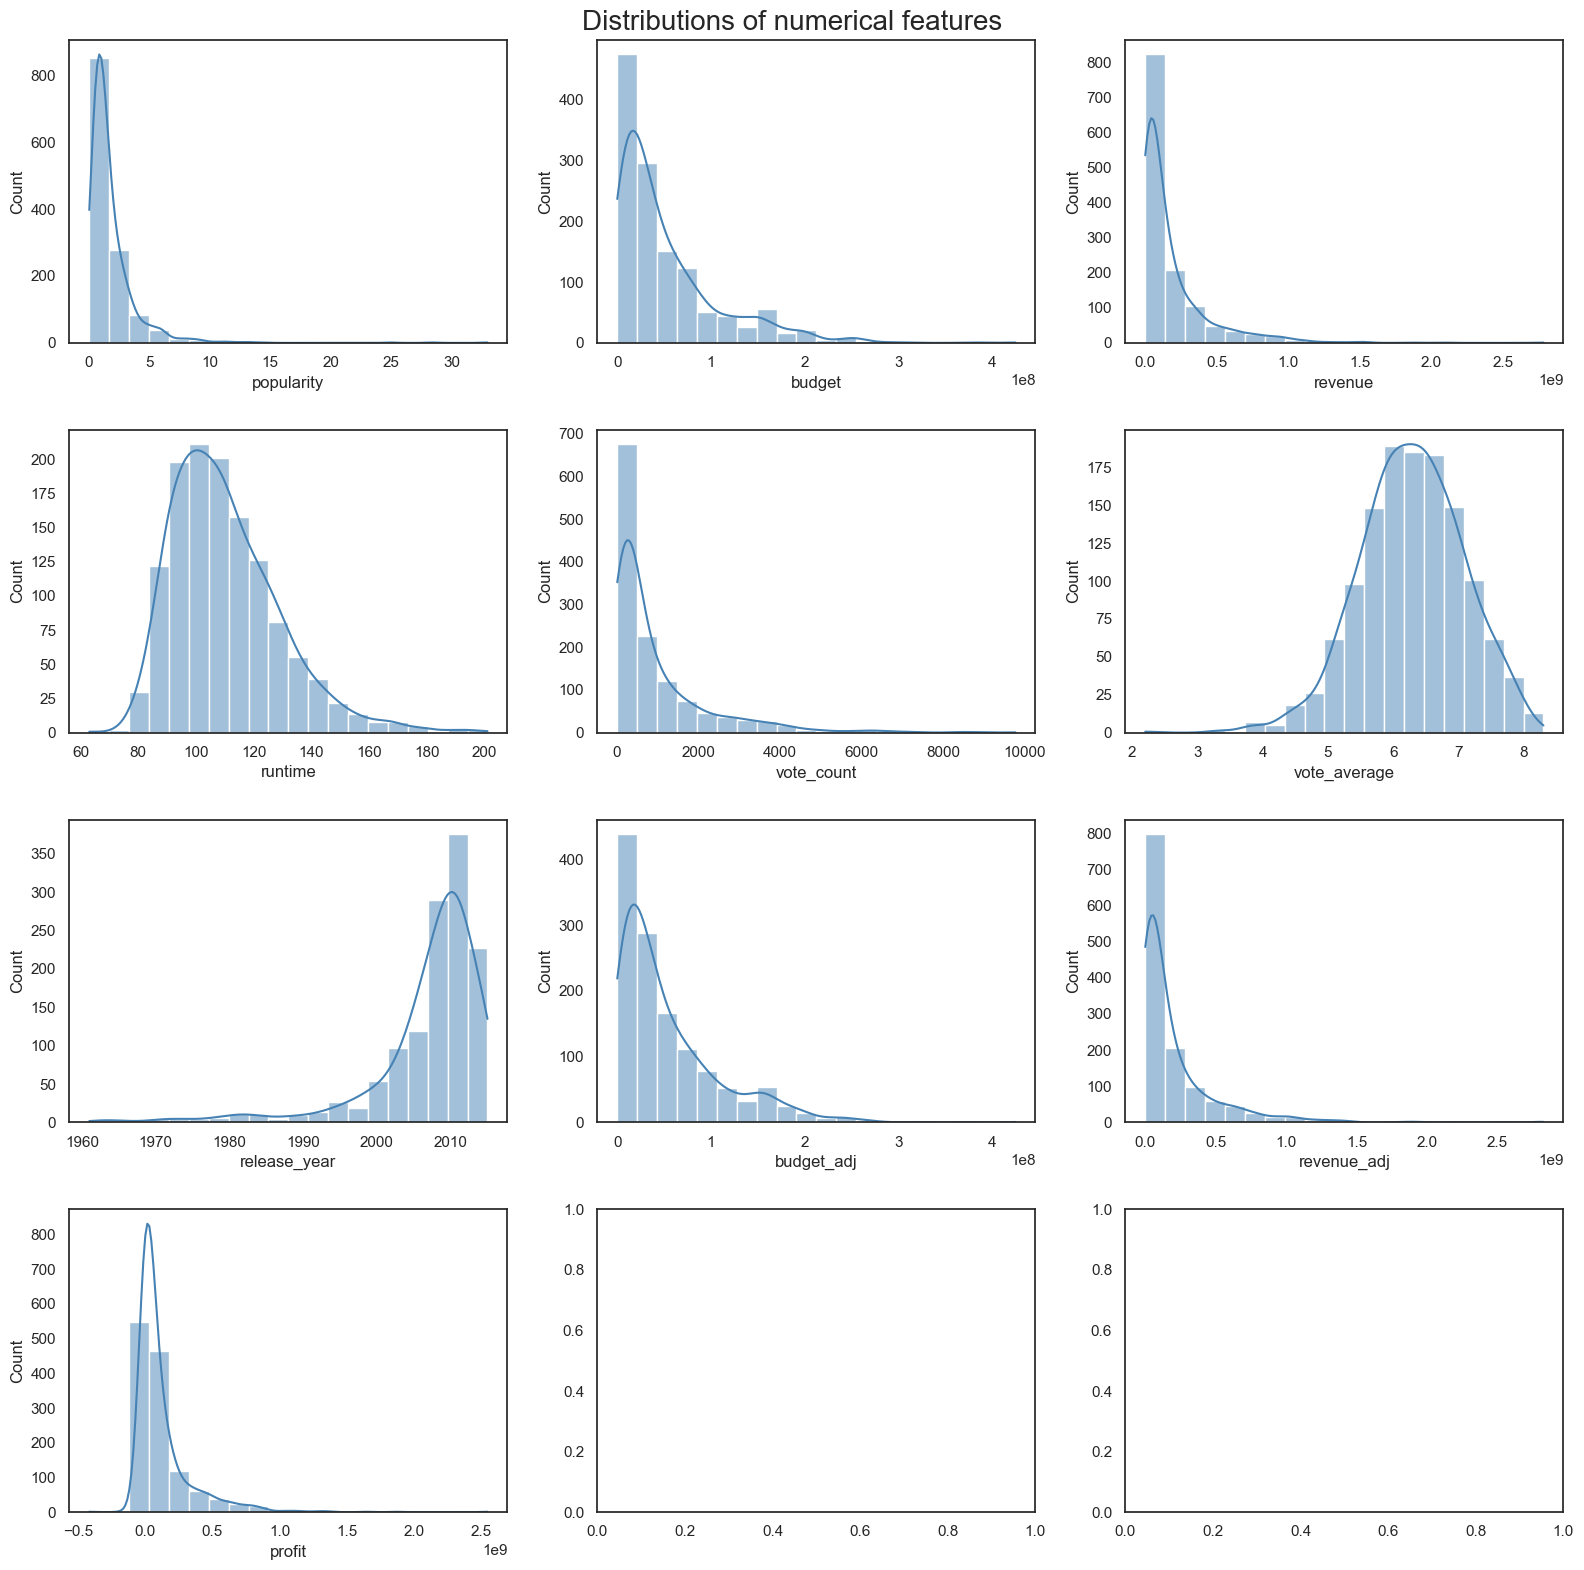

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
for col, ax in zip(num_cols, axes.flat):
    sns.histplot(x=col, data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('Distributions of numerical features', fontsize=20)
plt.tight_layout(h_pad=2)

#save_fig("num_cols_distribution_plots")

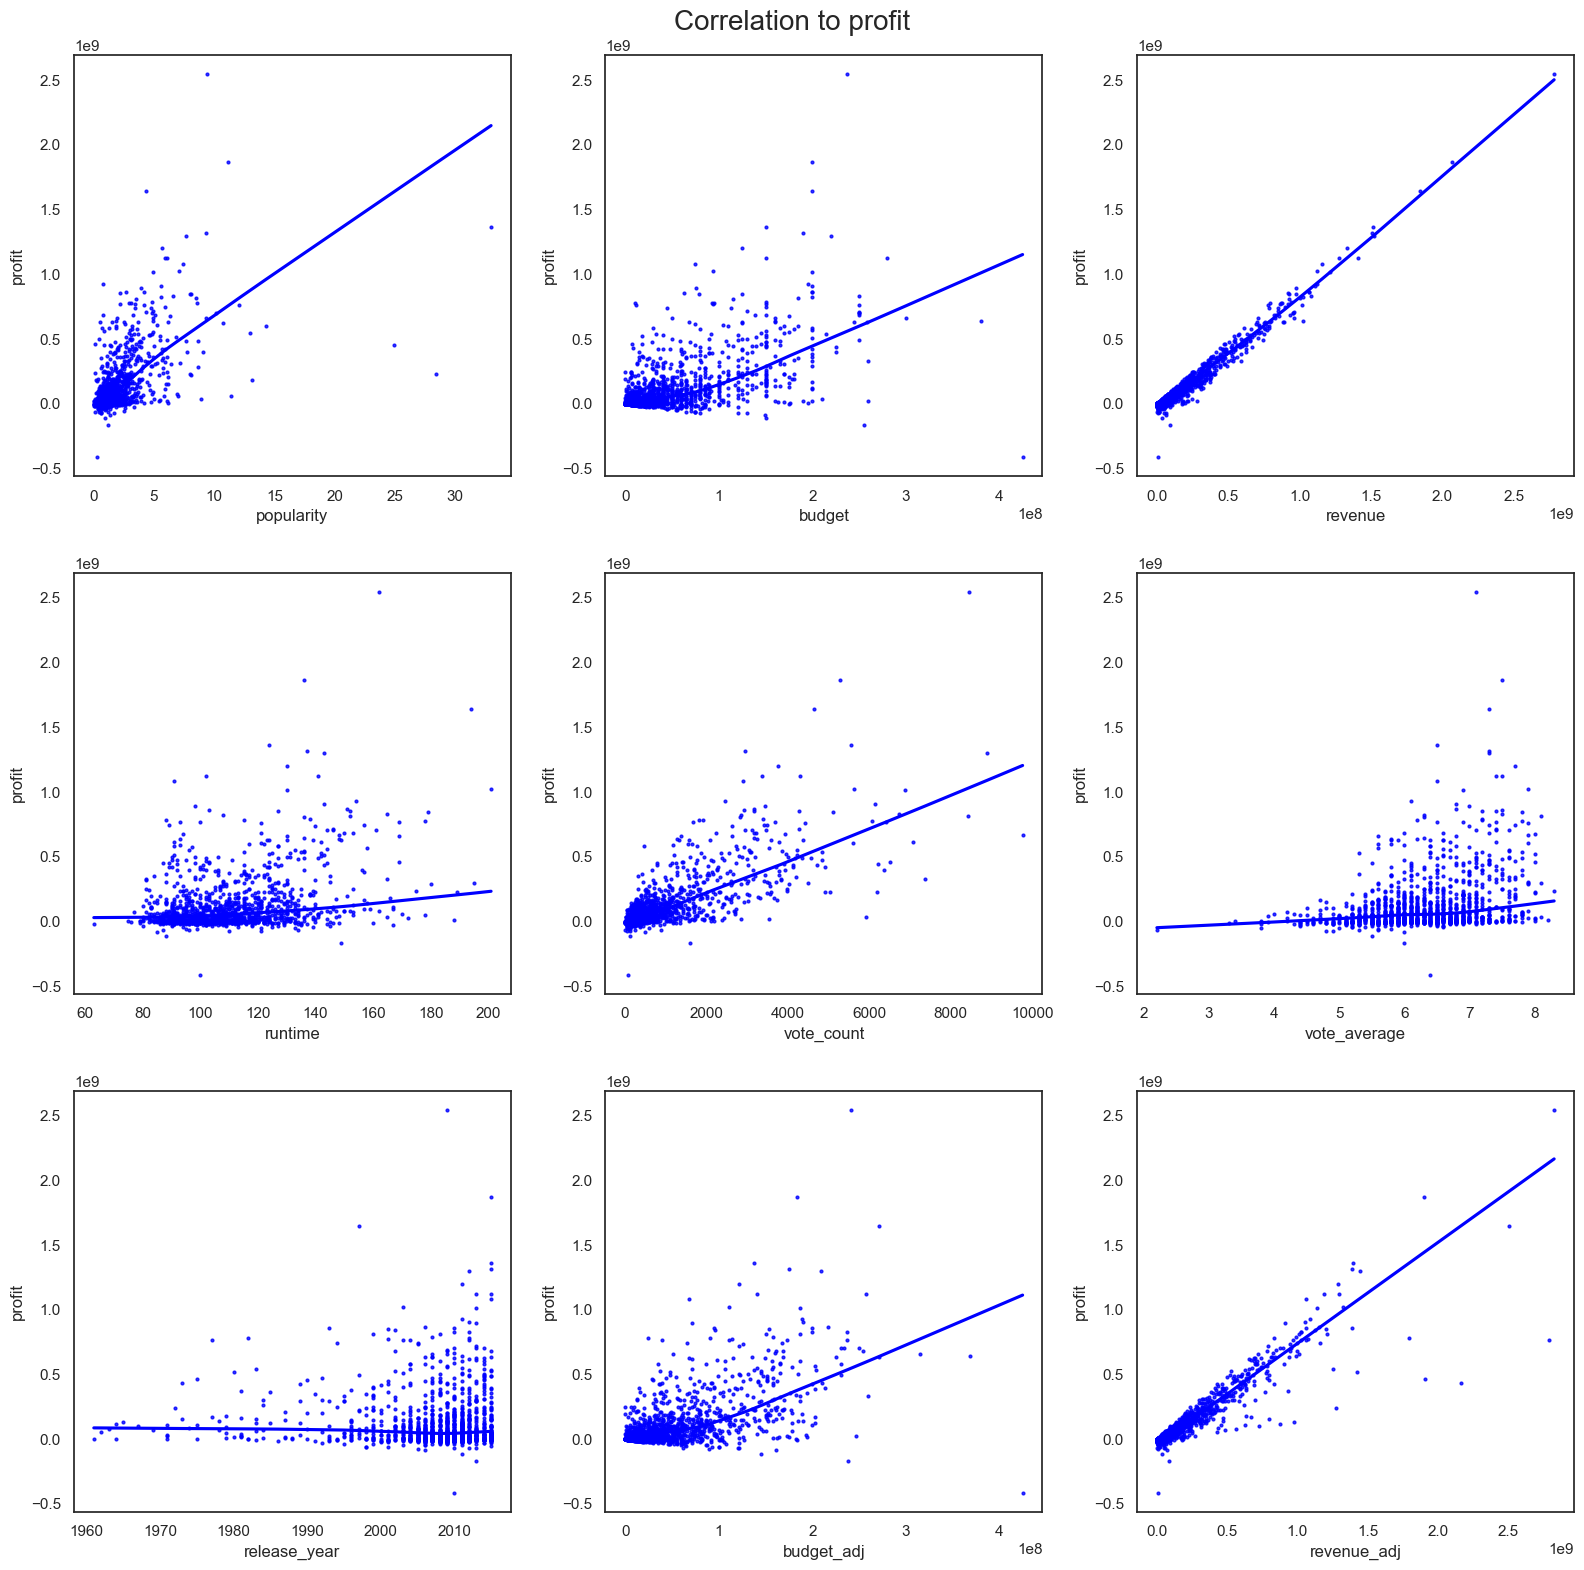

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for col, ax in zip(num_cols, axes.flat):
    sns.regplot(data=dataset, x=col, y="profit", lowess=True, scatter=True, color='blue',ax=ax,scatter_kws={'s': 4, 'marker': '.'})
fig.suptitle('Correlation to profit', fontsize=20)
plt.tight_layout(h_pad=2)

next we find the relationship between popularity and target group popularity_level

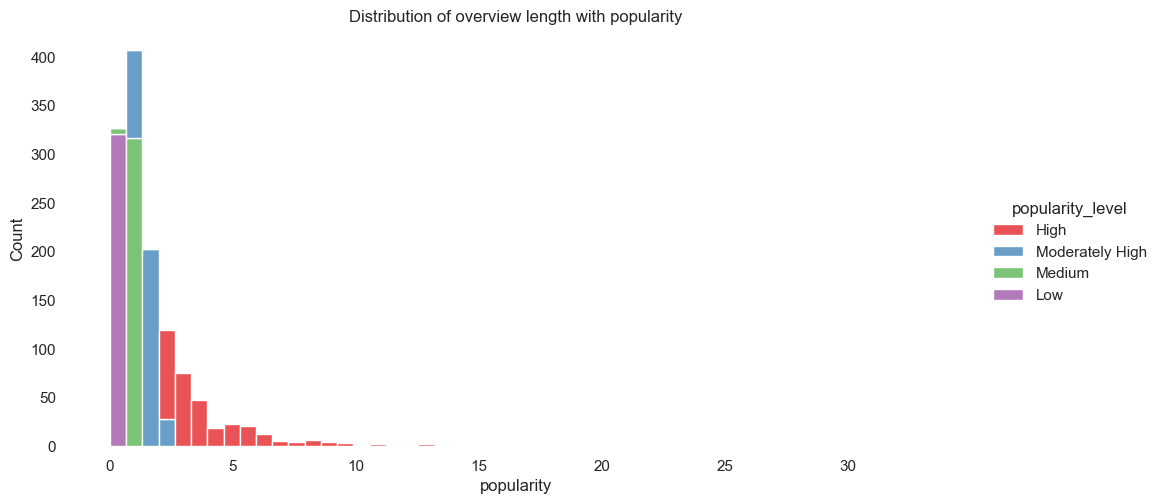

In [22]:
sns.displot(data=dataset, kind='hist', x='popularity', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

popularity is feature directly related to popularity level, we consider budget revenue, runtime, vote_count as training features

In [23]:
training_features = ["budget_adj","runtime","vote_count", "vote_average", "popularity", "popularity_level"]

### Vsualization of movie popularity

For some of the attributes such as popularity, budget, revenue and profit, there are outliers data points with 1 or 2 movies having very large numbers. We can choose to discretize them into groups based on quantiles. Doing so will remove the effect of outlier points skewing the model, however it will also cause some loss of information as we know that budget and popularity are closely linked to profit. Therefore, at this stage we will keep both original and discretized attributes and test in during modelling phase.

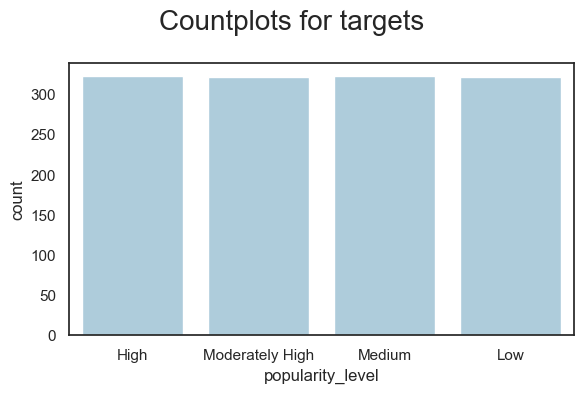

In [24]:
# see target spread
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.countplot(x=dataset["popularity_level"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()

target groups are evenly spread, this is a balanced dataset

### Vsualization of profit

In [25]:
# try discretize thalch into groups
min_profit = dataset.profit.min()
max_profit = dataset.profit.max()
print(min_profit, max_profit)

-413912431.0 2544505847.0


Text(0.5, 0.98, 'Distributions of profit')

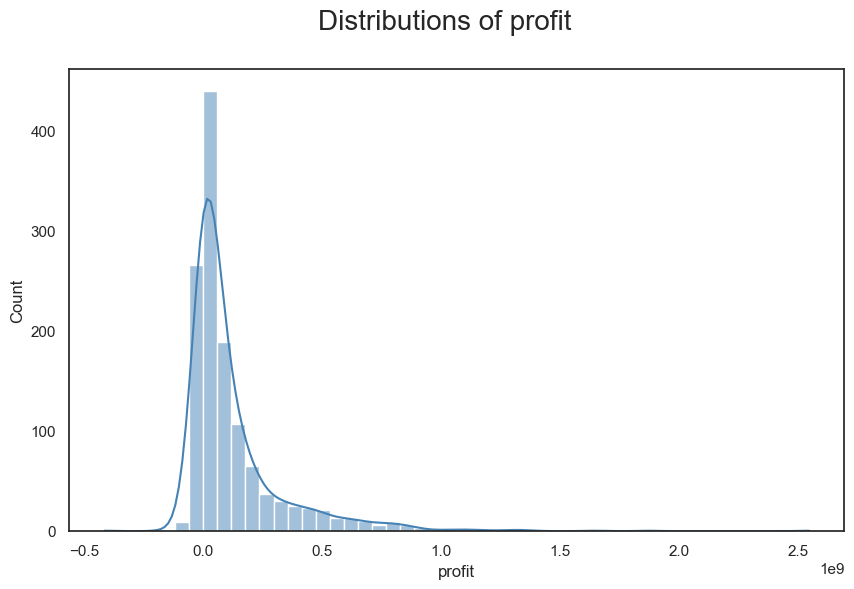

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.histplot(x="profit", data=dataset, bins=50, kde=True, ax=ax, color='steelblue')
fig.suptitle('Distributions of profit', fontsize=20)

In [27]:
q1 = np.percentile(dataset["profit"].values, 25)
q2 = np.percentile(dataset["profit"].values, 50)
q3 = np.percentile(dataset["profit"].values, 75)
print(q1,q2,q3)

3133385.5 45327949.0 147120040.75


In [28]:
dataset['profit_groups_1'] = pd.cut(dataset.profit, bins=[
    min_profit+10*min_profit, 
    0, 
    0.44*10**8, 
    1.4*10**8,   
    max_profit*10
])

In [29]:
# check out each age group's size and proportion of subscribing (y=1)
profit_groups = dataset.pivot_table(index='profit_groups_1', values='popularity', aggfunc=[np.size, np.mean]).reset_index()
profit_groups.columns = ['profit_groups_1', 'size', 'popularity']
profit_groups

profit_groups_1  size  popularity
0          (-4553036741.0, 0.0]   265    0.746435
1             (0.0, 44000000.0]   372    1.137016
2     (44000000.0, 140000000.0]   313    1.571816
3  (140000000.0, 25445058470.0]   336    3.529306

In [30]:
def preprocess_group(x):
    if x == '(-4553036741.0, 0.0]':
        return 0
    elif x == '(0.0, 44000000.0]':
        return 1
    elif x == '(44000000.0, 140000000.0]':
        return 2
    elif x == '(140000000.0, 25445058470.0]':
        return 3

In [31]:
dataset["profit_groups_1"] = dataset["profit_groups_1"].astype("str")
dataset["profit_groups"] = dataset["profit_groups_1"].apply(lambda x : preprocess_group(x))

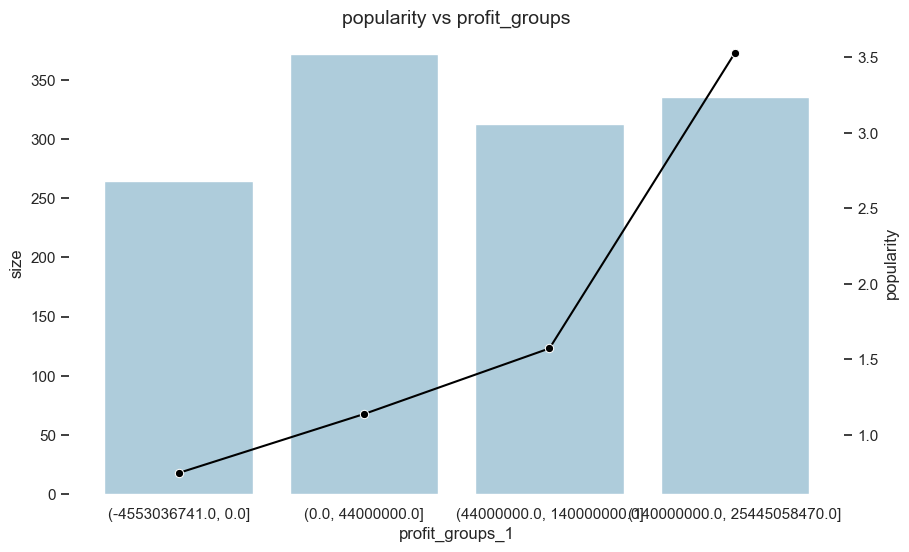

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=profit_groups, x='profit_groups_1', y='size', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=profit_groups['popularity'], marker='o', color='black', sort = False, ax=ax2)
sns.despine(left=True, bottom=True)
plt.title('popularity vs profit_groups', fontsize=14);

target groups are evenly spread, this is a balanced dataset, more popular movie is more profitable

we create another target group called profitability, with 1 meaning the movie is profitable and 0 meaning the movie made a loss

In [33]:
def preprocess_group2(x):
    if x < 0:
        return 0
    else:
        return 1

In [34]:
dataset["profitability"] = dataset["profit"].apply(lambda x : preprocess_group2(x))

In [35]:
# check out each age group's size and proportion of subscribing (y=1)
profitability_groups = dataset.pivot_table(index='profitability', values='popularity', aggfunc=[np.size, np.mean]).reset_index()
profitability_groups.columns = ['profitability', 'size', 'popularity']
profitability_groups

profitability  size  popularity
0              0   265    0.746435
1              1  1021    2.057585

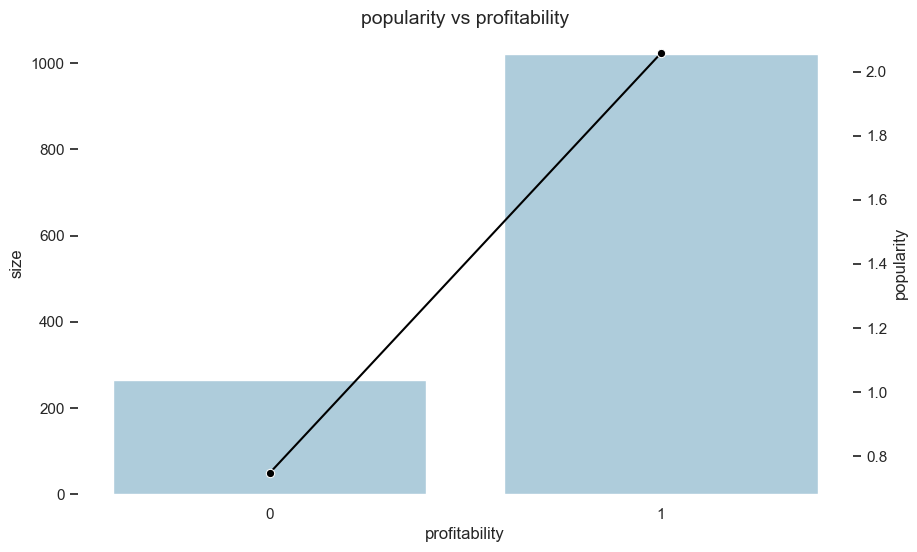

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=profitability_groups, x="profitability", y='size', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=profitability_groups['popularity'], marker='o', color='black', sort = False, ax=ax2)
sns.despine(left=True, bottom=True)
plt.title('popularity vs profitability', fontsize=14);

### Visualization of movie over time

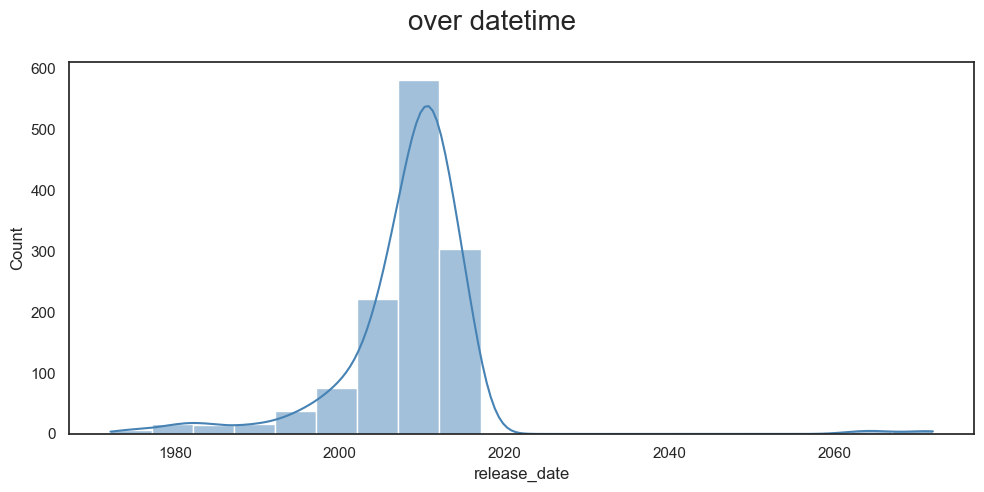

In [37]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)


notice that there are erroneous entries, we need to correct the entries based on their years

In [38]:
max_date_threshold =  pd.to_datetime('2024-03-30')
dataset.loc[dataset["release_date"] >= max_date_threshold]

Unnamed: 0     id    imdb_id  popularity      budget      revenue  \
1259        9849    646  tt0055928    3.170651   1100000.0   59600000.0   
1260        9881    658  tt0058150    3.153791   3500000.0  124900000.0   
1261        9884    704  tt0058182    0.812194    500000.0    1000549.0   
1262        9925    681  tt0066995    1.755117   7200000.0  116000000.0   
1263        9927    984  tt0066999    0.885391   4000000.0   35976000.0   
1264        9932    636  tt0066434    0.627942    777000.0    2437000.0   
1265        9951  25188  tt0067328    0.369308   1300000.0   29133000.0   
1270       10131    430  tt0055256    0.303783   3000000.0    4000000.0   
1278       10401    667  tt0062512    1.554808   9500000.0  111584787.0   
1279       10438    657  tt0057076    2.508235   2500000.0   78898765.0   
1283       10689    660  tt0059800    1.910465  11000000.0  141195658.0   
1284       10724    668  tt0064757    1.778746   7000000.0   81974493.0   

                       original_title  \
1259                           Dr. No   
1260                       Goldfinger   
1261               A Hard Day's Night   
1262             Diamonds Are Forever   
1263                      Dirty Harry   
1264                         THX 1138   
1265            The Last Picture Show   
1270                  One, Two, Three   
1278              You Only Live Twice   
1279            From Russia With Love   
1283                      Thunderball   
1284  On Her Majesty's Secret Service   

                                                   cast  \
1259  Sean Connery|Ursula Andress|Joseph Wiseman|Jac...   
1260  Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...   
1261  John Lennon|Paul McCartney|George Harrison|Rin...   
1262  Sean Connery|Jill St. John|Charles Gray|Lana W...   
1263  Clint Eastwood|Harry Guardino|Reni Santoni|Joh...   
1264  Robert Duvall|Donald Pleasence|Don Pedro Colle...   
1265  Timothy Bottoms|Jeff Bridges|Cybill Shepherd|B...   
1270  James Cagney|Liselotte Pulver|Horst Buchholz|P...   
1278  Sean Connery|Akiko Wakabayashi|Karin Dor|Mie H...   
1279  Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...   
1283  Sean Connery|Claudine Auger|Adolfo Celi|Lucian...   
1284  George Lazenby|Diana Rigg|Telly Savalas|Gabrie...   

                                               homepage           director  \
1259          http://www.mgm.com/view/movie/566/Dr.-No/      Terence Young   
1260      http://www.mgm.com/view/movie/760/Goldfinger/       Guy Hamilton   
1261     http://www.thebeatles.com/film/hard-days-night     Richard Lester   
1262  http://www.mgm.com/view/movie/529/Diamonds-Are...       Guy Hamilton   
1263             http://www.warnerbros.com/dirty-harry/         Don Siegel   
1264                       http://www.thx1138movie.com/       George Lucas   
1265                 http://www.filmsite.org/lastp.html  Peter Bogdanovich   
1270       http://en.wikipedia.org/wiki/One,_Two,_Three       Billy Wilder   
1278  http://www.mgm.com/view/movie/2347/You-Only-Li...      Lewis Gilbert   
1279  http://www.mgm.com/view/movie/717/From-Russia-...      Terence Young   
1283    http://www.mgm.com/view/movie/2009/Thunderball/      Terence Young   
1284  http://www.mgm.com/view/movie/1411/On-Her-Maje...      Peter R. Hunt   

                                                tagline  \
1259  NOW meet the most extraordinary gentleman spy ...   
1260       Everything he touches turns into excitement!   
1261  The Beatles, starring in their first full-leng...   
1262            The man who made 007 a household number   
1263  Detective Harry Callahan. He doesn't break mur...   
1264  Visit the future where love is the ultimate cr...   
1265  Anarene, Texas, 1951. Nothing much has changed...   
1270                Billy Wilder's Explosive New Comedy   
1278  You Only Live Twice...and Twice is the only wa...   
1279  The world's masters of murder pull out all the...   
1283                    Look up!  Look down!  Look out!   
1284 

In [39]:
for index, row in dataset.loc[dataset["release_date"] >= max_date_threshold].iterrows():
    dataset.at[index,"release_date"] = pd.to_datetime(f'{str(row["release_year"])}-{str(row["release_date"].month)}-{str(row["release_date"].day)}')


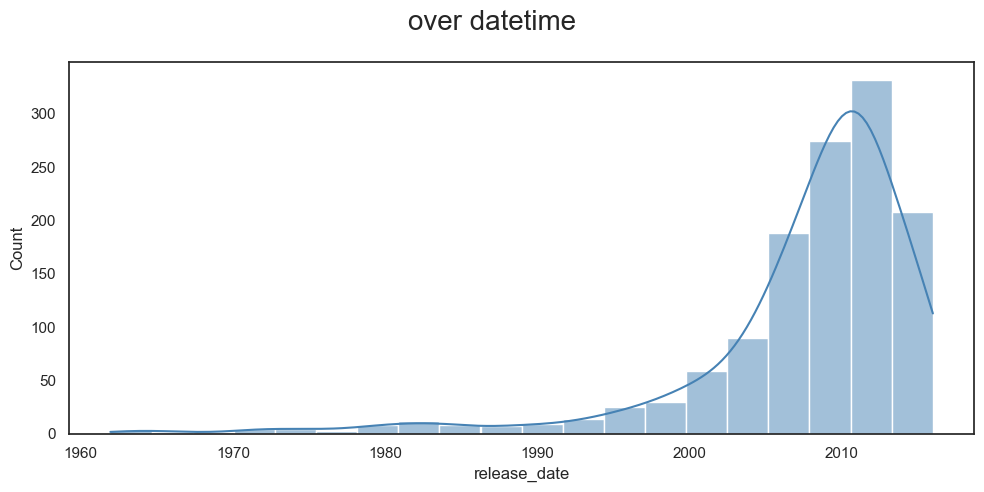

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))    
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)

### Visualize profit over release_year

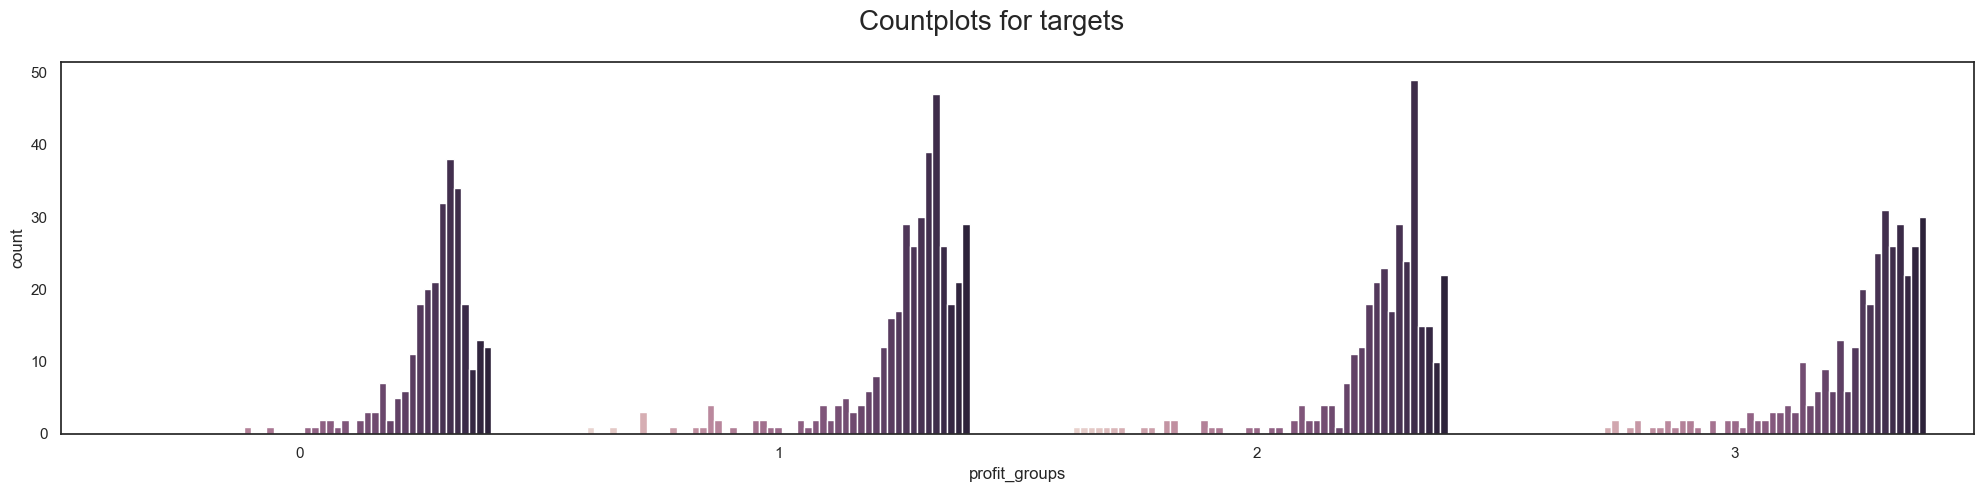

In [41]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.countplot(x=dataset["profit_groups"], hue=dataset["release_year"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
ax.legend_.remove()

we can see that there are minor difference across years (pink is most recent, with blue and orange in the past), movies created recently seems to have higher ratings, this could be due to better visual effects etc, however we should not consider this as training feature because popularity levels are derived from comparison of movies of same timeframe, hence it is more likely that as years goes ratings are higher due to other factors

hence we need to take care of this using time series kfold later on

### Extracting month in datetime and visualize

In [42]:
dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)

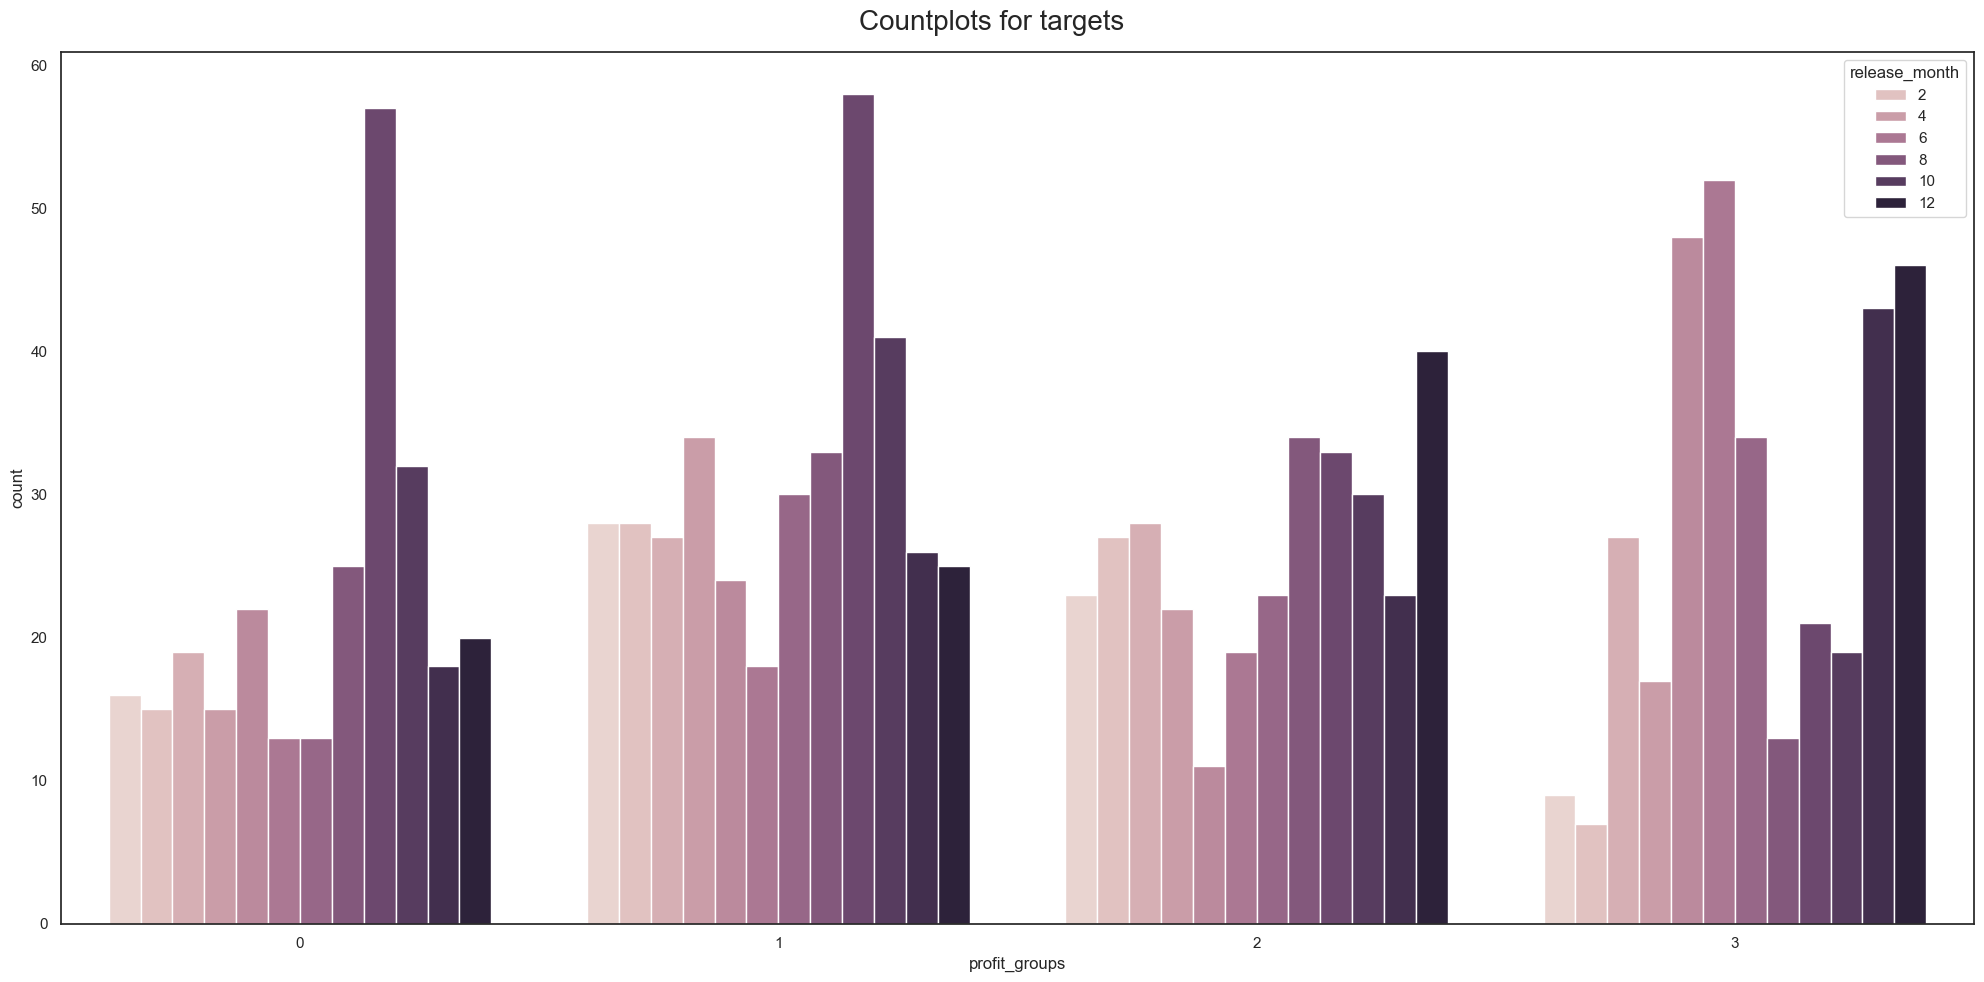

In [43]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.countplot(x=dataset["profit_groups"], hue=dataset["release_month"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we see some months have abnomally low /medium ratings such as september and december, while some have higher ratings such as may, this may be due to many unknown but chronic factors hence this could be use as a training feature

In [44]:
training_features.append("release_month")

### Handling categorical features and feature extraction

Before we conduct feature extraction, we will need to split the dataset into train and test set so as not to cause information leakage, which will cause us to obtain a better than actual performance

In [45]:
# dataset=dataset.sort_values(by="release_date")

In [46]:
from sklearn.model_selection import train_test_split
# dataset_train, dataset_test = train_test_split(dataset, test_size=0.15,random_state=42)
dataset_train, dataset_test = train_test_split(dataset, test_size=test_ratio,shuffle=False)
dataset_train = dataset_train.sample(frac=1,random_state=42).reset_index(drop=True)
dataset_test = dataset_test.sample(frac=1,random_state=42).reset_index(drop=True)
dataset_orig = dataset.copy()
dataset = dataset_train.copy()

In [47]:
dataset = dataset.reset_index(drop = True)
dataset = dataset.reset_index()

In [48]:
dataset.iloc[0]["overview"]

'Rebellious Jake Tyler is lured into an ultimate underground fight Scene at his new high school, after receiving threats to the safety of his friends and family Jake decides to seek the mentoring of a veteran fighter who trains him for one final no-holds-barred elimination fight with his nemesis and local martial arts champion Ryan McCarthy.'

from the above, we can see that we need to do some feature extraction from the columns to generate meaningful categories

- length of title - The length of a movie title may influence how audiences perceive the film. A shorter, catchy title might be more memorable and easier to recall, potentially leading to increased interest and viewership. On the other hand, a longer title might convey more information about the movie's content or theme, which could attract specific audiences but might also be seen as less accessible to others.

- length of tagline - Short and catchy taglines are often more memorable and impactful. They can succinctly capture the essence of the movie and leave a lasting impression on audiences. A well-crafted short tagline might generate curiosity and interest, potentially leading to higher ratings as viewers are intrigued to watch the film. The length of a tagline can affect its ability to communicate the movie's theme or premise effectively. A concise tagline can quickly convey the central idea or emotion of the film, making it easier for audiences to understand what to expect. However, if a tagline is too short or cryptic, it might fail to provide enough information, leading to confusion or misinterpretation.

- length of overview - A succinct overview that effectively summarizes the movie's plot, themes, and key elements can enhance audience understanding and engagement. If the overview is too lengthy or convoluted, it may fail to communicate the movie's core aspects clearly, potentially leading to confusion and dissatisfaction among viewers. The length of the overview can influence audience expectations regarding the movie's content and quality. A well-written and comprehensive overview can provide insight into what viewers can expect from the film, helping to manage expectations and increase the likelihood of a positive reception. Conversely, a brief or vague overview may not adequately convey the movie's appeal, leading to disappointment and lower ratings.

In [49]:
def getlength(x):
    words = x.split()
    return len(words)

In [50]:
dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))

In [51]:
colA= ["title length","tagline length","overview length"] 

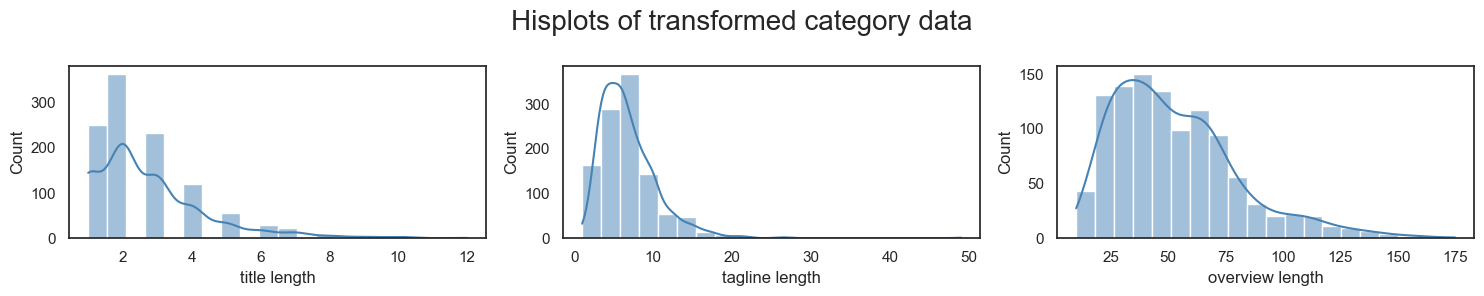

In [52]:
sns.set_palette('Paired')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    sns.histplot(x=colA[i],data = dataset, bins = 20, kde = True, ax=ax, color= 'steelblue')
fig.suptitle('Hisplots of transformed category data', fontsize=20)
plt.tight_layout()

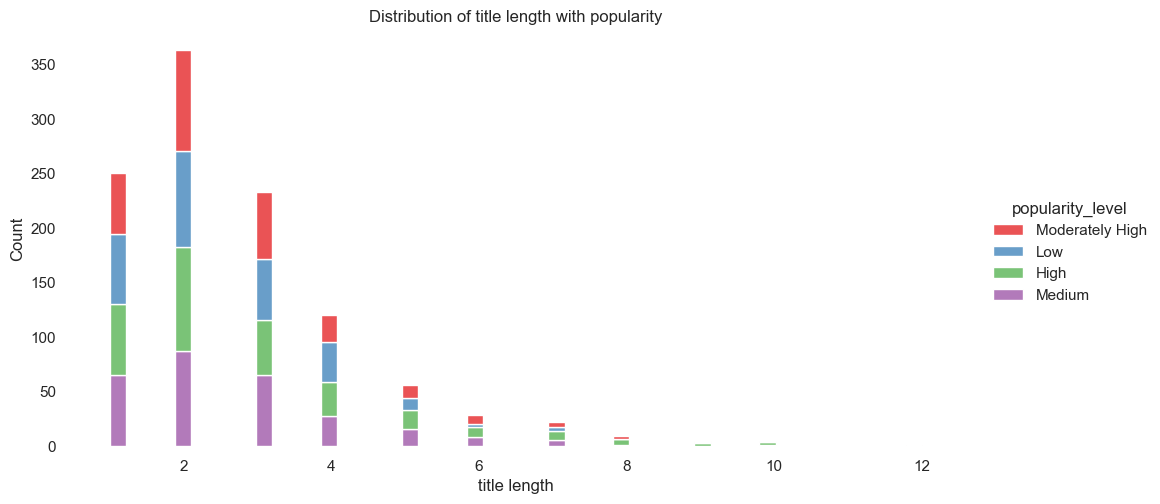

In [53]:
sns.displot(data=dataset, kind='hist', x='title length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of title length with popularity');

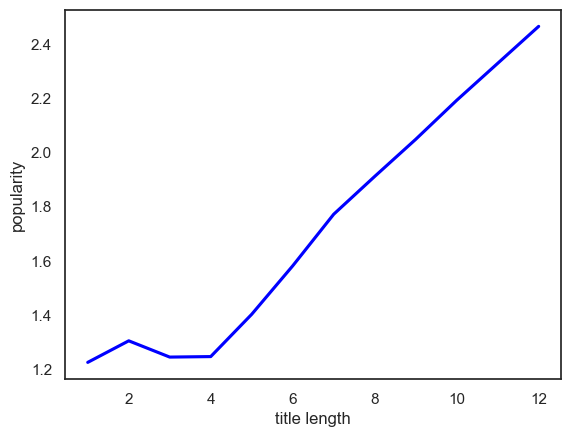

In [54]:
sns.regplot(data=dataset, x='title length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

title length not useful

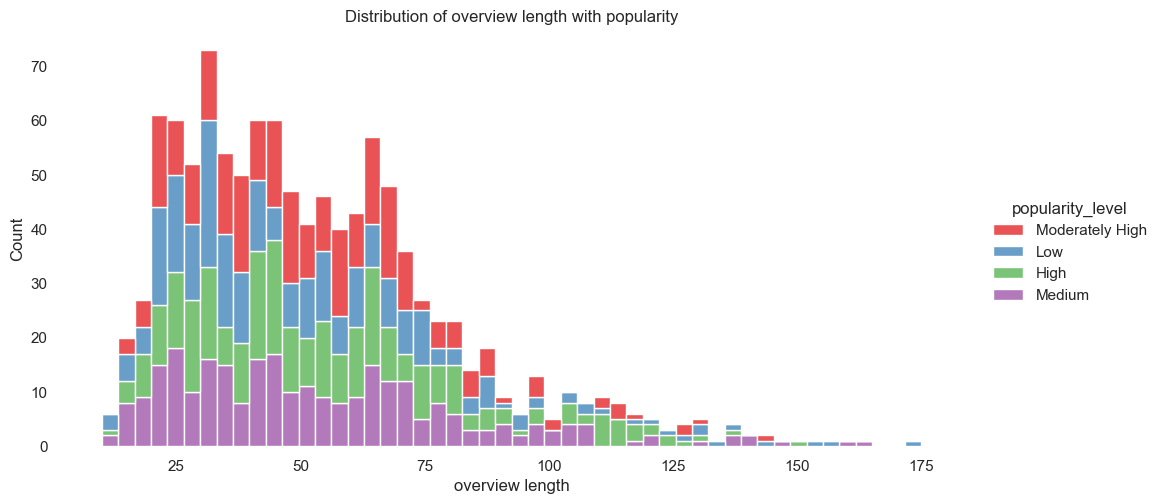

In [55]:
sns.displot(data=dataset, kind='hist', x='overview length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

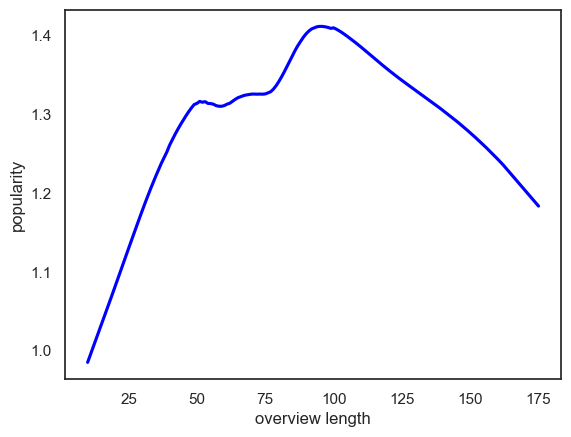

In [56]:
sns.regplot(data=dataset, x='overview length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

overview length might be useful, too short overview might not give audience enough information to capture their interest, while too long overview length may be boring and cause audiences to lose interest.

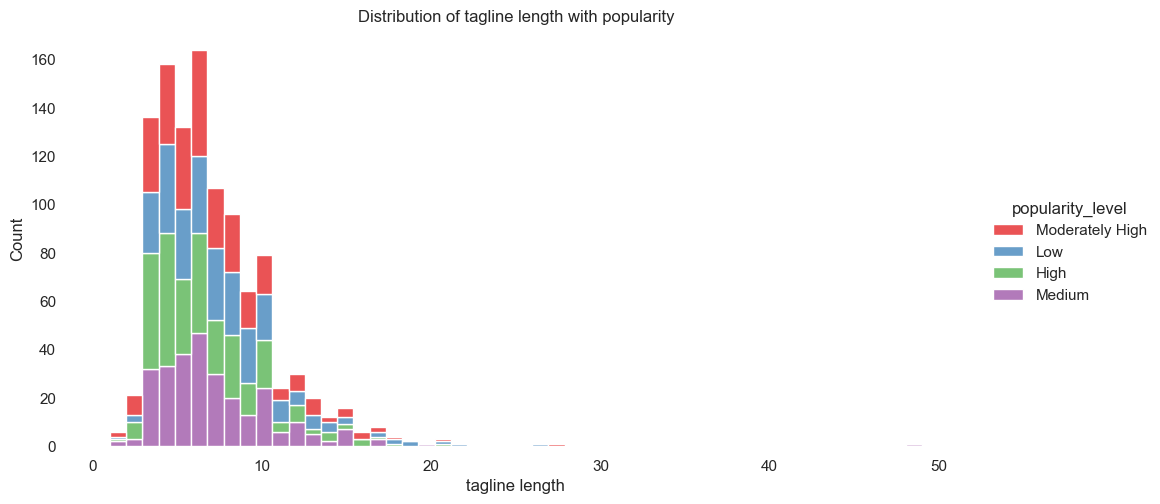

In [57]:
sns.displot(data=dataset, kind='hist', x='tagline length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of tagline length with popularity');

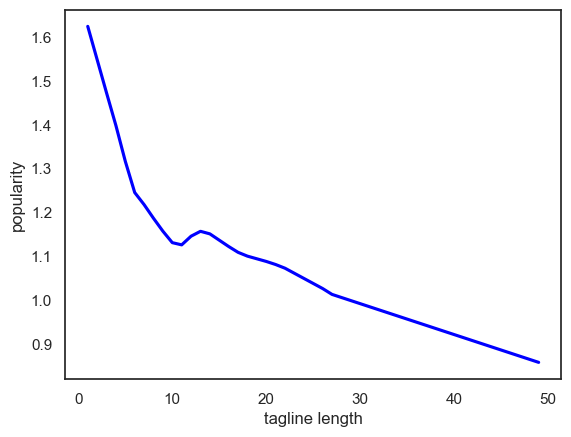

In [58]:
sns.regplot(data=dataset, x='tagline length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

tagline length is very useful, one reason is that short tagline is more catchy and memorizable and impressionable

In [59]:
#training_features.append("title length")
training_features.append("tagline length")
training_features.append("overview length")

In [60]:
training_features

['budget_adj',
 'runtime',
 'vote_count',
 'vote_average',
 'popularity',
 'popularity_level',
 'release_month',
 'tagline length',
 'overview length']

### One hot encoding important category features

In [61]:
def onehotencode(dataset,col):
    df = pd.DataFrame()
    df[col] = dataset[col].str.split('|')
    one_hot_encoded = pd.get_dummies(df[col].apply(pd.Series).stack()).sum(level=0)
    return one_hot_encoded

In [62]:
OHE_cast = onehotencode(dataset,"cast")

lets take a look at the movies Chris Pratt acted in

In [63]:
dataset.iloc[OHE_cast.loc[OHE_cast["Chris Pratt"] != 0].index]

index  Unnamed: 0      id    imdb_id  popularity       budget  \
13      13        3448   63492  tt0770703    1.120851   20000000.0   
173    173        4414   97630  tt1790885    1.554441   40000000.0   
229    229        3457   60308  tt1210166    1.081676   50000000.0   
335    335         630  118340  tt2015381   14.311205  170000000.0   
394    394        1454   10521  tt0901476    1.074072   30000000.0   
463    463           0  135397  tt0369610   32.985763  150000000.0   
580    580        4446   72207  tt1195478    1.095479   30000000.0   

          revenue            original_title  \
13   3.042610e+07       What's Your Number?   
173  1.328207e+08          Zero Dark Thirty   
229  1.102062e+08                 Moneyball   
335  7.733124e+08   Guardians of the Galaxy   
394  1.146635e+08                Bride Wars   
463  1.513529e+09            Jurassic World   
580  5.390975e+07  The Five-Year Engagement   

                                                  cast  \
13   Chris Evans|Anna Faris|Martin Freeman|Chris Pr...   
173  Jessica Chastain|Jason Clarke|Mark Strong|Joel...   
229  Brad Pitt|Jonah Hill|Robin Wright|Philip Seymo...   
335  Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
394  Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...   
463  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
580  Emily Blunt|Alison Brie|Jason Segel|Rhys Ifans...   

                                       homepage          director  \
13         http://www.whatsyournumbermovie.com/        Mark Mylod   
173   http://www.zerodarkthirty-movie.com/site/   Kathryn Bigelow   
229             http://www.moneyball-movie.com/    Bennett Miller   
335                 http://marvel.com/guardians        James Gunn   
394                    http://www.bridewars.com       Gary Winick   
463               http://www.jurassicworld.com/   Colin Trevorrow   
580  http://www.thefiveyearengagementmovie.com/  Nicholas Stoller   

                                               tagline  \
13         Ally's looking for the best ex of her life.   
173                    The Greatest Manhunt in History   
229                         What are you really worth?   
335                        All heroes start somewhere.   
394                             May the best bride win   
463                                  The park is open.   
580  A comedy about the journey between popping the...   

                                              keywords  \
13     based on novel|loser|magazine|womanizer|mission   
173         assassination|cia|hotel|terrorist|prisoner   
229  underdog|based on novel|baseball|teamwork|partner   
335  marvel comic|spaceship|space|scene during end ...   
394        bride|friendship|engagement|rivalry|wedding   
463  monster|dna|tyrannosaurus rex|velociraptor|island   
580     sex|san francisco|restaurant|frustration|chase   

                                              overview  runtime  \
13   Ally Darling (Anna Faris) is realizing she's a...      106   
173  A chronicle of the decade-long hunt for al-Qae...      157   
229  The story of Oakland Athletics general manager...      133   
335  Light years from Earth, 26 years after being a...      121   
394  Two best friends become rivals when their resp...       89   
463  Twenty-two years after the events of Jurassic ...      124   
580  Exactly one year after Tom meets Violet, he su...      124   

                                        genres  \
13                              Comedy|Romance   
173                     Thriller|Drama|History   
229                                      Drama   
335           Action|Science Fiction|Adventure   
394                                     Comedy   
463  Action|Adventure|Science Fiction|Thriller   
580                                     Comedy   

                                  production_companies release_date  \
13   Regency Enterprises|Contrafilm|New Regency Pic...   2011-09-30   
173  Columbia Pictures|Annapurna Pictur

In [64]:
OHE_cast.shape

(1093, 2582)

For categories such as casts, directors, keywords, genre, and production companies, we One-hot-encode (OHE) them to usable features. However, these OHE features are very sparse and have extremely high dimensions (>2000), exceeding the number of entries (1286).  This means that no prediction model will work well as a model trained on these features will be high in complexity and have very large hypothesis space which will require dataset with many more entries to prevent overfitting. Hence, we aim to reduce the hypothesis space by dimensionality reduction. 
- PCA
- SelectKBest

### Dimension reduction - PCA

In [65]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=OHE_cast.shape[0])  # Specify the number of components you want to reduce to
pca_result = pca.fit_transform(OHE_cast)

# Create DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result)

In [66]:
pca_df["popularity_level"] = dataset["popularity_level"]

Text(0.5, 1.0, 'Explained Variance')

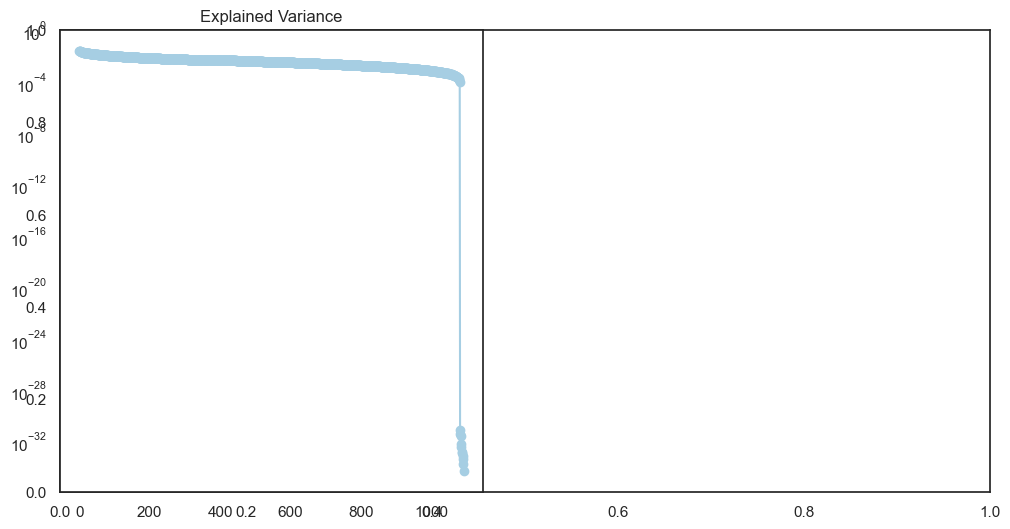

In [67]:
fig, ax= plt.subplots(figsize=(12, 6))

plt.subplot(121)
plt.semilogy(pca.explained_variance_, '-o')
# plt.axvline(x=1020, c='r', ls='--', label=r'$j=17$')
plt.title('Explained Variance')
# plt.xlim(0, 10)
# plt.ylim( 10 ** -4,  1)
# plt.legend()

notice that the explained variance do not drop at first few principal components, this indicates PCA is not ideal in this context, nevertheless we try to visualize PCA results

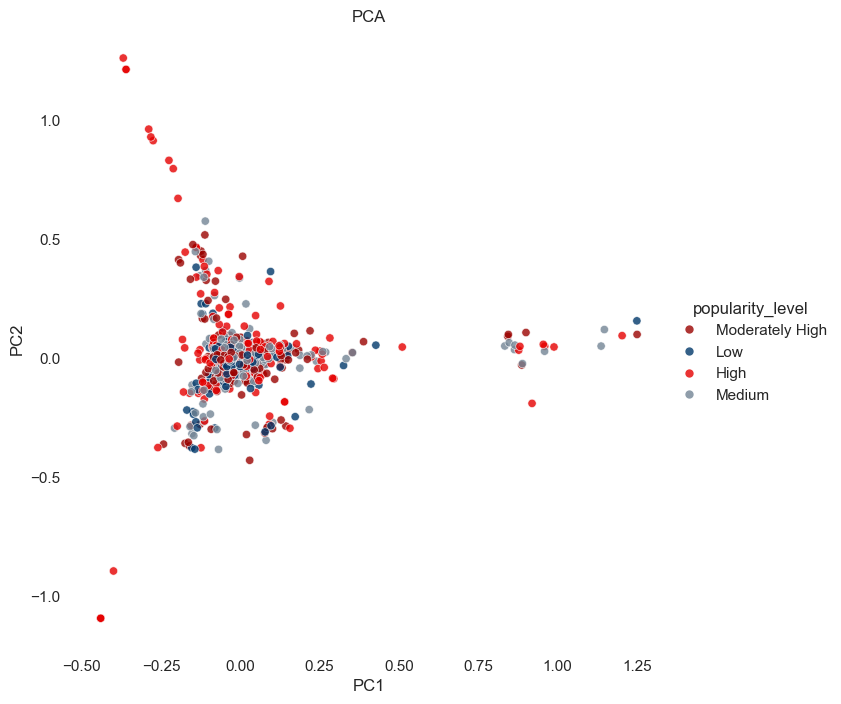

In [68]:
sns.relplot(x=pca_df[0], y=pca_df[1], hue=pca_df["popularity_level"], kind='scatter', height=7, alpha=0.8, 
           palette={'Low':sns.xkcd_rgb['marine blue'],
                    'Medium':sns.xkcd_rgb['steel'],
                    "Moderately High" : sns.xkcd_rgb['deep red'],
                    "High" : sns.xkcd_rgb["red"]
                   }
           )
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.box(False);

### Dimension reduction - SelectKbest

Based on the general 98-2 rule, where 2% of actors make 98% of profits or vice-versa, we select top/bottom 2% actors which is around 100.

We choose popularity instead of profit as the metric for selectKbest because based on our prior knowledge, there is a more direct link between actors and movie’s popularity instead of movie’s profit. 

In [69]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Perform feature selection using SelectKBest with chi-squared test
k = 100 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_cast, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_cast = OHE_cast.columns[selected_indices]
selected_cast = selected_cast.tolist()

In [70]:
selected_cast

['Alicia Vikander',
 'Andy Serkis',
 'Angela Bassett',
 'Arnold Schwarzenegger',
 'Ben Kingsley',
 'Ben Stiller',
 'Brad Pitt',
 'Brooke Shields',
 'Carrie Fisher',
 "Catherine O'Hara",
 'Chris Hemsworth',
 'Christian Bale',
 'Clifton Collins, Jr.',
 'Daniel Craig',
 'Daniel Radcliffe',
 'Danny Glover',
 'David Wenham',
 'Dax Shepard',
 'Denis Leary',
 'Elijah Wood',
 'Emma Watson',
 'Ewan McGregor',
 'Graham McTavish',
 'Harrison Ford',
 'Harry Connick Jr.',
 'Helena Bonham Carter',
 'Hugo Weaving',
 'Ian McDiarmid',
 'Ian McKellen',
 'Jacob Latimore',
 'Jacob Vargas',
 'Jake T. Austin',
 'James Gandolfini',
 'Jeff Goldblum',
 'Jennifer Hudson',
 'Jeremy Renner',
 'Jeremy Sisto',
 'Jesse Eisenberg',
 'John Goodman',
 'John Krasinski',
 'Johnny Depp',
 'Jon Favreau',
 'Jordana Brewster',
 'Joseph Gordon-Levitt',
 'Josh Duhamel',
 'Julia Roberts',
 'Justin Long',
 'Kate Beckinsale',
 'Kelly McGillis',
 'Kelly Preston',
 'Ken Bevel',
 'Kenneth Welsh',
 'Leonardo DiCaprio',
 'Leslie Mann'

observing the selected top 50 cast, we can easily observe that they are all names of recognizable famous actors, lets count the movies they acted in


In [71]:
def countmovies(x, df):
    count = df.loc[df[x] != 0][x].count()
    return count

In [72]:
df_cast = pd.DataFrame(selected_cast, columns= ["cast"])
df_cast["number of movies"] = df_cast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_cast = df_cast.sort_values(by = "number of movies", ascending = False)

In [73]:
df_cast

cast  number of movies
75   Robert Downey Jr.                15
83  Scarlett Johansson                13
40         Johnny Depp                12
21       Ewan McGregor                12
85          Seth Rogen                11
..                 ...               ...
70    Rachelle Lefevre                 2
57         Lucas Black                 2
59        Mark Duplass                 2
66       Nathan Gamble                 2
50           Ken Bevel                 2

[100 rows x 2 columns]

In [74]:
def getpopcast(x, indexlist):
    if x in indexlist:
        return 1
    else:
        return 0

In [75]:
mlist = []
for cast in df_cast['cast'].tolist():
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

In [76]:
dataset = dataset.sort_values(by = "popularity")

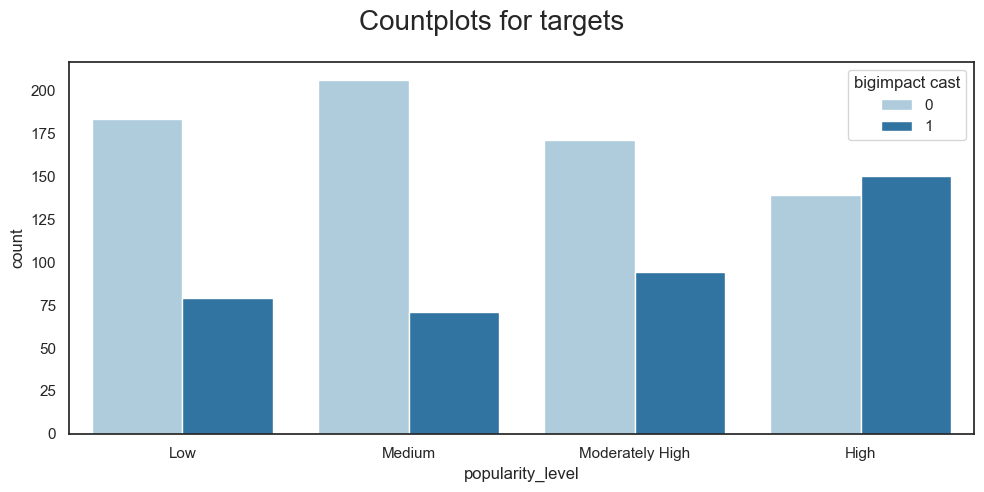

In [77]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the significance of these top 100 actors are that they either acted in very good movies or very bad movies

- because kbest also select bad actors, we need to account for this

In [78]:
badcast = []
for casts in dataset.loc[(dataset["bigimpact cast"] != 0)&(dataset["popularity_level"] == "Low")]["cast"].values:
    casts = casts.split("|")
    badcast.append(casts)
badcast = [item for sublist in badcast for item in sublist]
badcast = set(badcast)

badcast2 = {}
for cast in df_cast['cast'].tolist():
    if cast in badcast:
        index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
        badcast2[cast] = dataset.iloc[index]["popularity"].mean()

In [79]:
badcast2

{'Robert Downey Jr.': 2.1902858,
 'Scarlett Johansson': 2.6950870769230764,
 'Ewan McGregor': 0.9133599166666667,
 'Seth Rogen': 2.348946909090908,
 'Natalie Portman': 1.3522382727272728,
 'Joseph Gordon-Levitt': 1.7021873636363636,
 'Leonardo DiCaprio': 1.398502999999999,
 'Emma Watson': 2.292018222222222,
 'Daniel Craig': 1.547246625,
 'John Goodman': 3.2267466249999983,
 'Justin Long': 1.644848875,
 'Julia Roberts': 1.3235173749999987,
 'Sean Penn': 1.655739375,
 'Ben Kingsley': 0.9607855000000001,
 'Elijah Wood': 1.5621004285714284,
 'Neil Patrick Harris': 1.3296567142857143,
 'Jesse Eisenberg': 1.287741428571427,
 'Leslie Mann': 1.8033949999999999,
 'Paul Walker': 1.6616929999999996,
 'Danny Glover': 2.237483,
 'Sarah Jessica Parker': 1.85275825,
 'Rainn Wilson': 1.7250082500000001,
 'Sheri Moon Zombie': 2.795067,
 'Sara Paxton': 1.2262663333333335,
 'Harry Connick Jr.': 1.9084443333333334,
 'Jordana Brewster': 1.278512,
 'Clifton Collins, Jr.': 1.2462286666666667,
 'Brooke Shield

as we can see, some popular cast are in the bad cast candidates, we need to remove them. we keep cast with average popularity of less than dataset's average in bad cast list

In [80]:
final_badcast = []
final_goodcast = []
for i,v in badcast2.items():
    if v < dataset["popularity"].mean():
        final_badcast.append(i)
    else:
        final_goodcast.append(i)

In [81]:
mlist = []
for cast in final_badcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

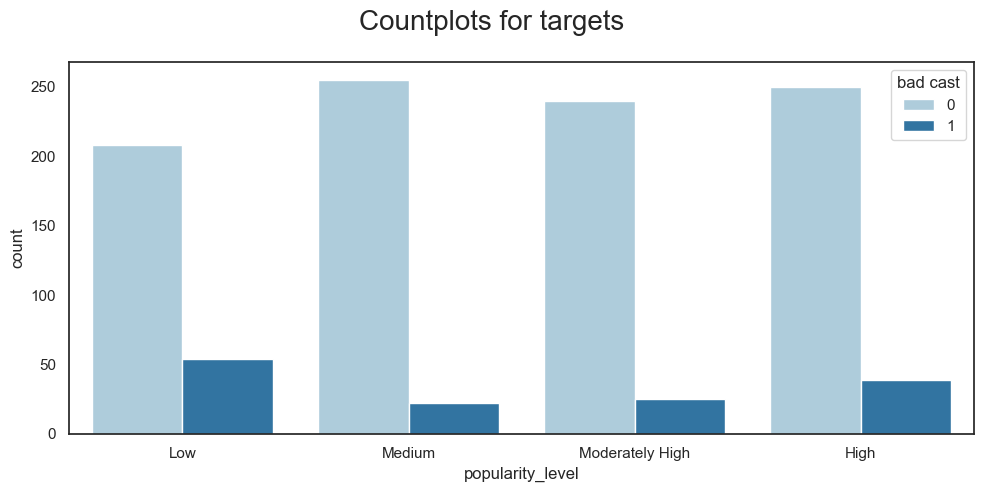

In [82]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the above, we observe that bad cast is not a useful feature, this may be because having bad cast does not mean movie cannot be positively impacted by good cast as seen in the moderately high popularity movies having more bad cast than low popularity movies, furthermore bad cast account for low percentage of Low ratings

### Dimension reduction - based on prior knowledge to get good cast

based on prior knowledge, we know that actors that acted in more movies are likely more popular and movies tend to have better ratings, so we are also interested actors that acted in many movies, we set the threshold at top 10 actors

In [83]:
all_cast = OHE_cast.columns.tolist()
df_allcast = pd.DataFrame(all_cast, columns= ["cast"])
df_allcast["number of movies"] = df_allcast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_allcast = df_allcast.sort_values(by = "number of movies", ascending = False)

In [84]:
df_allcast.head(100)

cast  number of movies
1677         Matt Damon                21
1646      Mark Wahlberg                19
172       Anne Hathaway                15
2086  Robert Downey Jr.                15
2181  Samuel L. Jackson                15
...                 ...               ...
1361  Justin Timberlake                 8
1322    Josh Hutcherson                 8
251        Ben Kingsley                 8
19         Adam Sandler                 8
1340      Julia Roberts                 8

[100 rows x 2 columns]

we will cut off at 7 movies (around top 2% quantile)

In [85]:
for cast in df_allcast.head(100)["cast"]:
    if df_allcast.loc[df_allcast["cast"] == cast]["number of movies"].values[0] >7:
        final_goodcast.append(cast)
final_goodcast = list(set(final_goodcast))
final_goodcast

['Keira Knightley',
 'Kate Winslet',
 'Morgan Freeman',
 'Samuel L. Jackson',
 'Paul Rudd',
 'Harrison Ford',
 'Tom Cruise',
 'Steve Carell',
 'Matt Damon',
 'Josh Hutcherson',
 'Emma Stone',
 'Edward Norton',
 'Tom Hardy',
 'Jacob Vargas',
 'Natalie Portman',
 'Brad Pitt',
 'Jacob Latimore',
 'Harry Connick Jr.',
 'Jack Black',
 'John Goodman',
 'Nicolas Cage',
 'Emily Blunt',
 'Dwayne Johnson',
 'Woody Harrelson',
 'Vin Diesel',
 'Julianne Moore',
 'John Leguizamo',
 'Gerard Butler',
 'Nathan Gamble',
 'Michael Fassbender',
 'Will Smith',
 'Charlize Theron',
 'Paul Bettany',
 'Liam Neeson',
 'Brendan Gleeson',
 'Seth Rogen',
 'Jake Gyllenhaal',
 'Jason Statham',
 'Sam Worthington',
 'Justin Timberlake',
 'Spencer Breslin',
 'Sarah Michelle Gellar',
 'Jennifer Aniston',
 'Anna Kendrick',
 'Lucas Black',
 'Kelly McGillis',
 'Michael Caine',
 'Cate Blanchett',
 'Jude Law',
 'Danny Glover',
 'Rachel Weisz',
 'Mark Strong',
 'Christian Bale',
 'Ben Kingsley',
 'James Franco',
 'Ian McKell

In [86]:
OHE_cast[final_goodcast]

Keira Knightley  Kate Winslet  Morgan Freeman  Samuel L. Jackson  \
0                   0             0               0                  0   
1                   0             0               0                  0   
2                   0             0               0                  0   
3                   0             0               0                  0   
4                   0             0               0                  0   
...               ...           ...             ...                ...   
1088                0             0               0                  0   
1089                0             0               0                  0   
1090                0             0               0                  0   
1091                0             0               0                  0   
1092                0             0               0                  0   

      Paul Rudd  Harrison Ford  Tom Cruise  Steve Carell  Matt Damon  \
0             0              0           0             0           0   
1             0              0           0             0           0   
2             0              0           0             0           0   
3             0              0           0             0           0   
4             0              0           0             0           0   
...         ...            ...         ...           ...         ...   
1088          0              0           0             0           0   
1089          0              0           0             0           0   
1090          0              0           0             0           0   
1091          0              0           0             0           0   
1092          0              0           0             0           0   

      Josh Hutcherson  Emma Stone  Edward Norton  Tom Hardy  Jacob Vargas  \
0                   0           0              0          0             0   
1                   0           0              0          0             0   
2                   0           0              0          0             0   
3                   0           0              0          0             0   
4                   0           0              0          0             0   
...               ...         ...            ...        ...           ...   
1088                0           0              0          0             0   
1089                0           0              0          0             0   
1090                0           0              0          0             0   
1091                0           0              0          0             0   
1092                0           0              0          0             0   

      Natalie Portman  Brad Pitt  Jacob Latimore  Harry Connick Jr.  \
0                   0          0               0                  0   
1                   0          0               0                  0   
2                   0          0               0                  0   
3                   0          0               0                  0   
4                   0          0               0                  0   
...               ...        ...             ...                ...   
1088                0          0               0                  0   
1089                0          0               0                  0   
1090                0          0               0                  0   
1091                0          0               0                  0   
1092                0          0               0                  0   

      Jack Black  John Goodman  Nicolas Cage  Emily Blunt  Dwayne Johnson  \
0              0             0             0            0               0   
1              0             0             0            0               0   
2              0             0             0            0               0   
3              0             0             0            0               0   
4              0             0             0            0               0   
...         

the reduced feature still has extremely high dimensions and sparse, hence we will need to transform it, we will categorize all movies with the actors present as 1 and without as 0

In [87]:
mlist = []
for cast in final_goodcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["popular cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

In [88]:
dataset = dataset.sort_values(by="popularity", ascending = False)

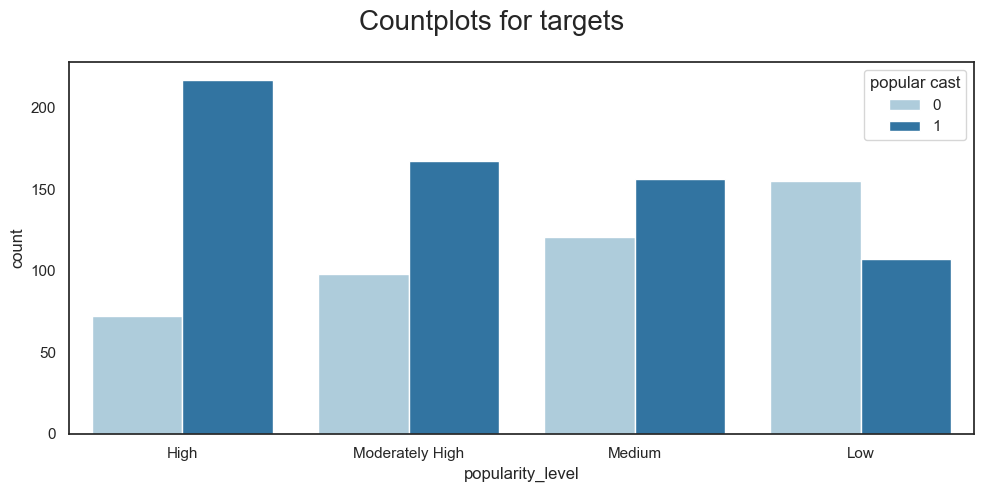

In [89]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the above plot show that we have successfully extracted a usable feature from cast

next we create a feature to calculate how many good cast in a single movie

In [90]:
def calculategoodcast(x, final_goodcast):
    i = 0
    for goodcast in final_goodcast:
        if goodcast in x:
            i+=1
    return i

In [91]:
dataset["num_goodcast"] = dataset["cast"].apply(lambda x : calculategoodcast(x, final_goodcast))

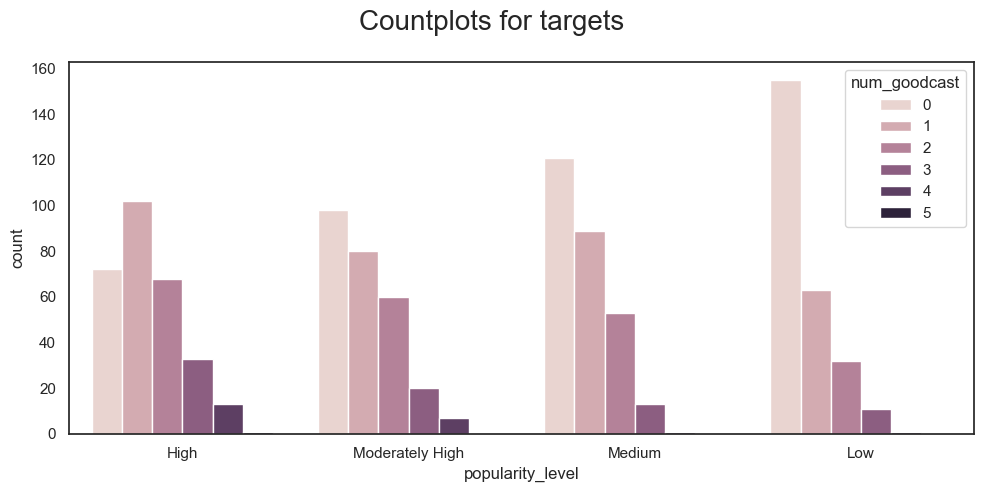

In [92]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["num_goodcast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we can see that num_goodcast is indeed very informative

In [93]:
training_features.append("num_goodcast")
training_features = set(training_features)
training_features = [item for item in set(training_features)]

In [94]:
#num: [budget, revenue, runtime, vote_count, tagline length, overview length, num_goodcast]
#cat: [release month]
#important list: final_goodcast
training_features

['release_month',
 'num_goodcast',
 'overview length',
 'vote_count',
 'vote_average',
 'runtime',
 'popularity',
 'tagline length',
 'popularity_level',
 'budget_adj']

### feature extraction from "director"

#### one hot encode

In [95]:
OHE_director = onehotencode(dataset,"director")

In [96]:
OHE_director.shape

(1093, 756)

In [97]:
OHE_director

Aaron Seltzer  Abe Sylvia  Adam McKay  Adam Shankman  \
463              0           0           0              0   
872              0           0           0              0   
617              0           0           0              0   
335              0           0           0              0   
218              0           0           0              0   
..             ...         ...         ...            ...   
279              0           0           0              0   
97               0           0           0              0   
310              0           0           0              0   
569              0           0           0              0   
200              0           0           0              0   

     Agnieszka Wojtowicz-Vosloo  Akiva Goldsman  Alan Poul  Alan Taylor  \
463                           0               0          0            0   
872                           0               0          0            0   
617                           0               0          0            0   
335                           0               0          0            0   
218                           0               0          0            0   
..                          ...             ...        ...          ...   
279                           0               0          0            0   
97                            0               0          0            0   
310                           0               0          0            0   
569                           0               0          0            0   
200                           0               0          0            0   

     Alejandro Agresti  Alejandro AmenÃ¡bar  Alejandro GonzÃ¡lez IÃ±Ã¡rritu  \
463                  0                    0                               0   
872                  0                    0                               0   
617                  0                    0                               0   
335                  0                    0                               0   
218                  0                    0                               0   
..                 ...                  ...                             ...   
279                  0                    0                               0   
97                   0                    0                               0   
310                  0                    0                               0   
569                  0                    0                               0   
200                  0                    0                               0   

     Aleksander Bach  Alex Garland  Alex Gibney  Alex Kendrick  Alex Proyas  \
463                0             0            0              0            0   
872                0             0            0              0            0   
617                0             0            0              0            0   
335                0             0            0              0            0   
218                0             0            0              0            0   
..               ...           ...          ...            ...          ...   
279                0             0            0              0            0   
97                 0             0            0              0            0   
310                0             0            0              0            0   
569                0             0            0              0            0   
200                0             0            0              0            0   

     Alex Rivera  Alexander Payne  Alexandre Aja  Alfonso CuarÃ³n  \
463            0                0              0                0   
872            0                0              0                0   
617            0                0              0                0   
335            0                0              0                0   
218            0                0              0                0   
..           ...              ...            ...           

#### SelectKbest

In [98]:
# Perform feature selection using SelectKBest with chi-squared test
k = 200 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_director, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_director = OHE_director.columns[selected_indices]
selected_director = selected_director.tolist()

In [99]:
mlist = []
for director in selected_director:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

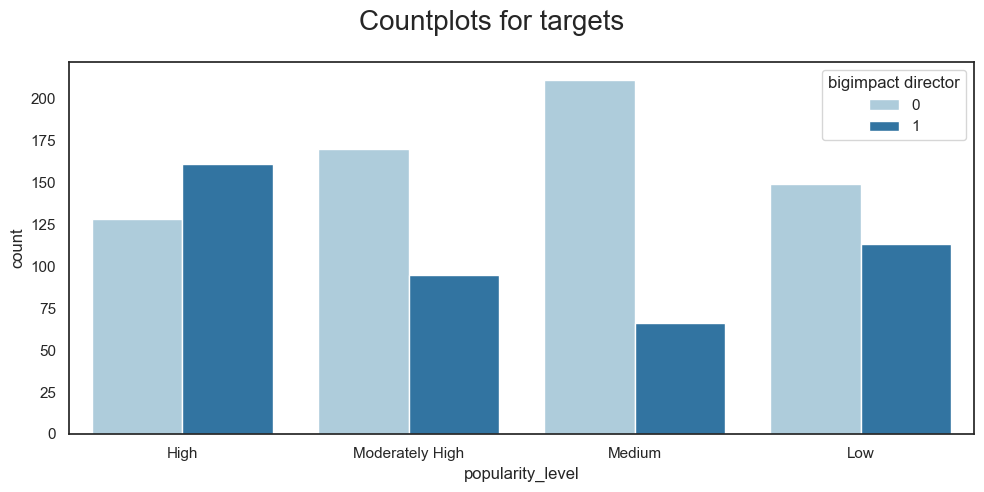

In [100]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

#### separate good and bad from Kbest

In [101]:
baddirector = []
for director in dataset.loc[(dataset["bigimpact director"] != 0)&(dataset["popularity_level"] == "Low")]["director"].values:
    baddirector.append(director)
baddirector = set(baddirector)

baddirector2 = {}
for director in selected_director:
    if director in baddirector:
        index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
        baddirector2[director] = dataset.iloc[index]["popularity"].mean()

In [102]:
baddirector2

{'Alex Kendrick': 1.1785185,
 'Brian Robbins': 1.822301333333333,
 'Charles Martin Smith': 0.699321,
 'Chris Columbus': 0.681346,
 'David Cronenberg': 1.209071,
 'David R. Ellis': 3.928971,
 'Francis Lawrence': 2.0230463333333337,
 'Gavin Hood': 3.6032466666666667,
 'James Cameron': 1.011741,
 'John Carpenter': 1.3166556666666633,
 'Jon M. Chu': 0.790277,
 'Justin Lin': 2.87576425,
 'Kevin Macdonald': 2.198738,
 'M. Night Shyamalan': 3.3669369999999965,
 'Matthew Vaughn': 0.8022896666666667,
 'Michael Patrick King': 0.826011,
 'Mike Disa': 0.6642,
 'Mike Judge': 1.840817,
 'MiloÅ¡ Forman': 1.265401,
 'Nathan Frankowski': 2.755051,
 'Nigel Cole': 1.496493,
 'Niki Caro': 0.427022999999999,
 'Olatunde Osunsanmi': 0.722961,
 'Oliver Stone': 1.0435193333333332,
 'Oren Moverman': 1.712799,
 'Patty Jenkins': 0.713697,
 'Paul Johansson': 2.476989,
 'Paul Schrader': 1.499784,
 'Paul W.S. Anderson': 1.2949590000000002,
 'Peter Cattaneo': 1.01377,
 'Phyllida Lloyd': 0.779648,
 'Prabhu Deva': 3.62

In [103]:
final_baddirector = []
for i,v in baddirector2.items():
    if v < dataset["popularity"].mean():
        final_baddirector.append(i)

In [104]:
mlist = []
for director in final_baddirector:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

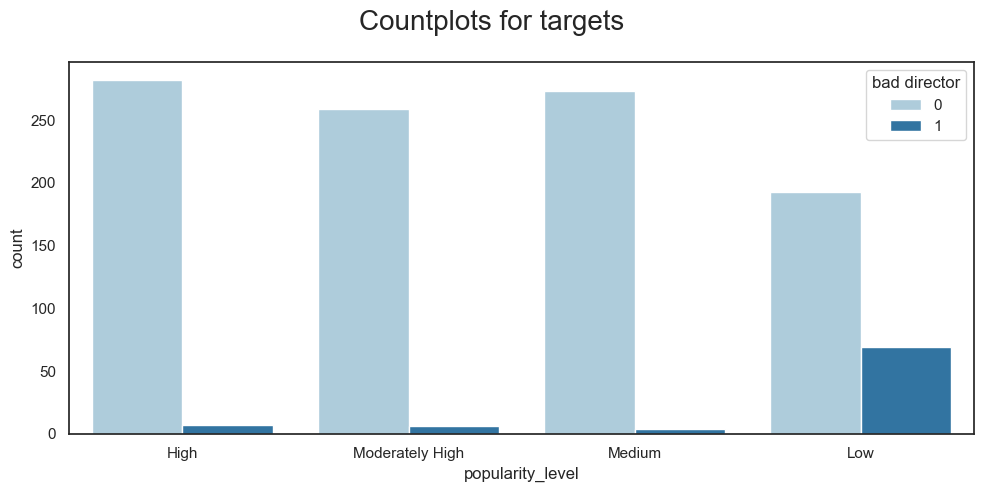

In [105]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we can see that bad directors do have higher chance of making bad movies, however they consist of small percentage of the population, hence we try to set another criteria to extract out poor performing director

#### do directors with more movies make better movies?

In [106]:
all_director = OHE_director.columns.tolist()
df_alldirector = pd.DataFrame(all_director, columns= ["director"])
df_alldirector["num_movies by director"] = df_alldirector["director"].apply(lambda x: countmovies(x,OHE_director))
df_alldirector = df_alldirector.sort_values(by = "num_movies by director", ascending = False)

In [107]:
df_alldirector.head(50)

director  num_movies by director
539       Peter Jackson                       8
674   Steven Soderbergh                       8
122      Clint Eastwood                       7
558   Quentin Tarantino                       6
607          Ron Howard                       6
118   Christopher Nolan                       6
149       David Fincher                       6
528  Paul W.S. Anderson                       6
210    Francis Lawrence                       6
394         Kevin Smith                       5
752         Zack Snyder                       5
463         Michael Bay                       5
594     Robert Zemeckis                       5
621           Sam Raimi                       5
452     Martin Scorsese                       5
574        Ridley Scott                       5
237      Gore Verbinski                       5
380          Justin Lin                       4
401      Lana Wachowski                       4
143    Darren Aronofsky                       4
532          Peter Berg                       4
675    Steven Spielberg                       4
707       Todd Phillips                       4
54   Baltasar KormÃ¡kur                       4
117  Christopher Miller                       4
520     Paul Greengrass                       4
410         Lee Unkrich                       4
550           Phil Lord                       4
357         Jon Favreau                       4
73            Brad Bird                       4
95      Carlos Saldanha                       4
696          Tim Burton                       4
245  Guillermo del Toro                       4
228        George Lucas                       4
178        Dennis Dugan                       4
419     Lilly Wachowski                       4
641          Shawn Levy                       4
186          Doug Liman                       4
432        Marc Forster                       4
169         David Yates                       4
14        Alex Kendrick                       4
660     Stephen Sommers                       3
103      Chris Columbus                       3
566        Rian Johnson                       3
561        Raja Gosnell                       3
222          Gavin Hood                       3
554       Pierre Coffin                       3
320        Joe Carnahan                       3
327          Joe Wright                       3
619          Sam Mendes                       3

In [108]:
dataset = dataset.merge(df_alldirector, on = "director", how = "left")

In [109]:
dataset = dataset.sort_values(by = "popularity", ascending = False)

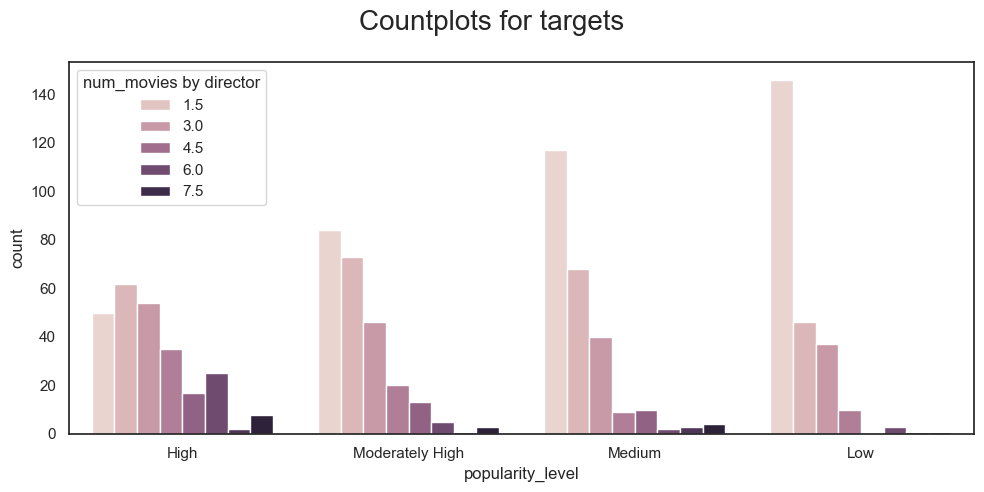

In [110]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["num_movies by director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the plot, we see that inexperienced director (1 movie) do tend to make worst movies, however there are barely any trending for directors with 2 or more movies, hence we create one feature called inexperienced director

In [111]:
inexperienced_director = df_alldirector.loc[df_alldirector["num_movies by director"] == 1]["director"].tolist()

In [112]:
mlist = []
for director in inexperienced_director:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["inexperienced_director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

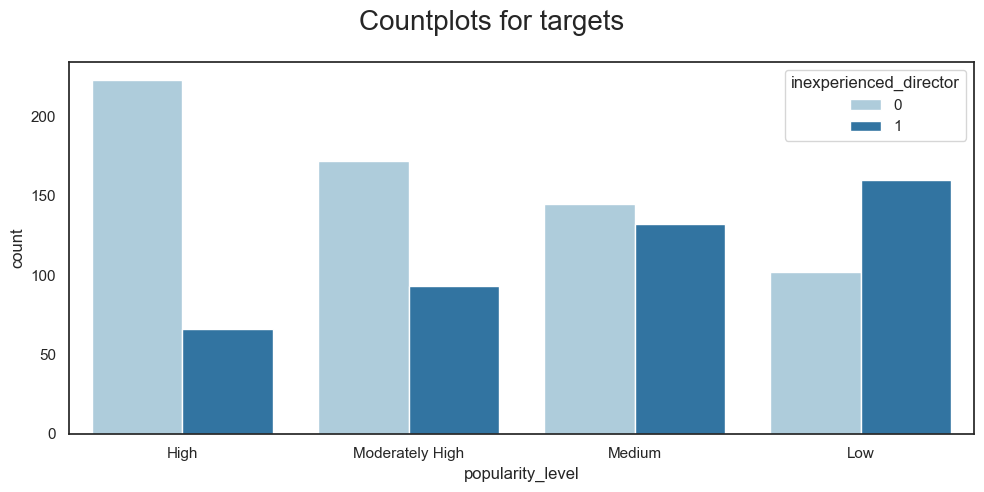

In [113]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["inexperienced_director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

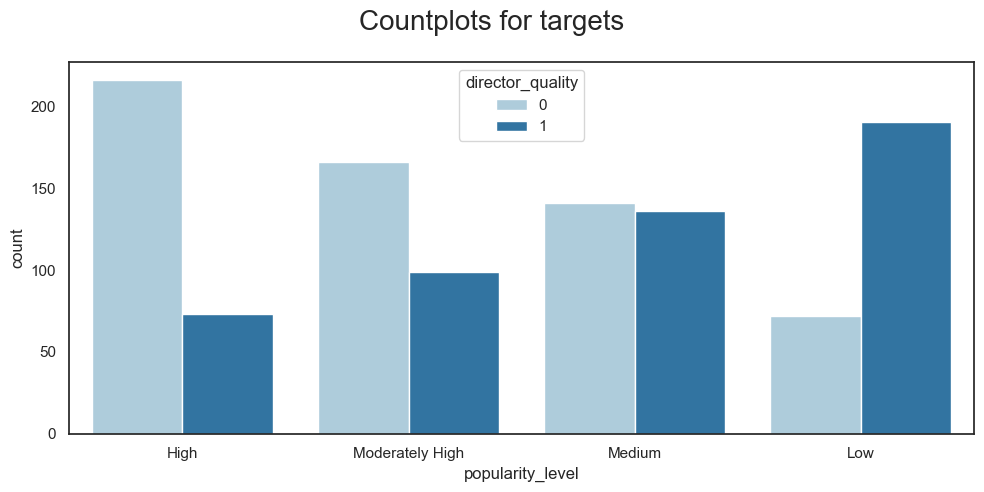

In [114]:
dataset["director_quality"] = ((dataset["inexperienced_director"] + dataset["bad director"])/2).apply(lambda x: int(x+0.5))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["director_quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [115]:
training_features.append("director_quality")
training_features = [item for item in set(training_features)]
#num: [budget, revenue, runtime, vote_count, vote_average, profit, tagline length, overview length, num_goodcast]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector

### feature extraction from production companies

#### one hot encode

In [116]:
OHE_production = onehotencode(dataset,"production_companies")

In [117]:
OHE_production.shape

(1093, 1419)

In [118]:
OHE_production

"DIA" Productions GmbH & Co. KG  10th Hole Productions  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
1088                                0                      0   
1089                                0                      0   
1090                                0                      0   
1091                                0                      0   
1092                                0                      0   

      11:11 Mediaworks  120dB Films  1492 Pictures  \
0                    0            0              0   
1                    0            0              0   
2                    0            0              0   
3                    0            0              0   
4                    0            0              0   
...                ...          ...            ...   
1088                 0            0              0   
1089                 0            0              0   
1090                 0            0              0   
1091                 0            0              0   
1092                 0            0              0   

      1984 Private Defense Contractors  2 Bridges Productions  2 Entertain  \
0                                    0                      0            0   
1                                    0                      0            0   
2                                    0                      0            0   
3                                    0                      0            0   
4                                    0                      0            0   
...                                ...                    ...          ...   
1088                                 0                      0            0   
1089                                 0                      0            0   
1090                                 0                      0            0   
1091                                 0                      0            0   
1092                                 0                      0            0   

      20th Century Fox  20th Century Fox Home Entertainment  \
0                    0                                    0   
1                    0                                    0   
2                    0                                    0   
3                    0                                    0   
4                    0                                    0   
...                ...                                  ...   
1088                 0                                    0   
1089                 0                                    0   
1090                 0                                    0   
1091                 0                                    0   
1092                 0                                    0   

      21 Laps Entertainment  26 Films  27 Films Production  2929 Productions  \
0                         0         0                    0                 0   
1                         0         0                    0                 0   
2                         0         0                    0                 0   
3                         0         0                    0                 0   
4                         0         0                    0                 0   
...                     ...       ...                  ...               ...   
1088                      0         0                    0                 0   
1089                      0         0                    0                 0   
1090                      1         0                    0                 0   
1091                      0         0                    0                 0   
1092          

#### SelectKbest

In [119]:
# Perform feature selection using SelectKBest with chi-squared test
k = 50 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_production, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_production = OHE_production.columns[selected_indices]
selected_production = selected_production.tolist()

In [120]:
mlist = []
for production in selected_production:
    index = OHE_production.loc[OHE_production[production] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact production"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

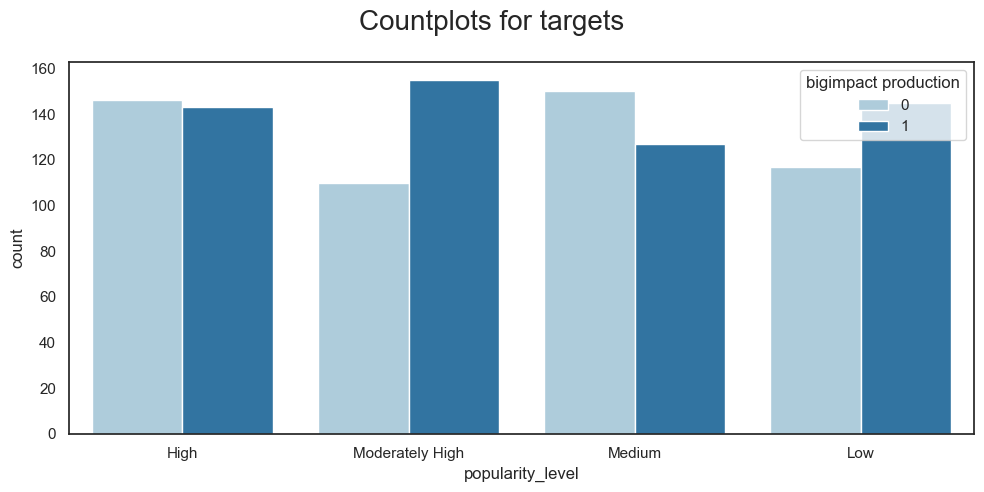

In [121]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact production"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

looks like there are no significant bad production company, however lets add one more criteria to further source out good production company. this criteria will be based on the number of movies they produced, based on the assumption that a production company that produce more movies is likely to produce better movies.

In [122]:
all_production = OHE_production.columns.tolist()
df_allproduction = pd.DataFrame(all_production, columns= ["production"])
df_allproduction["num_movies by production"] = df_allproduction["production"].apply(lambda x: countmovies(x,OHE_production))
df_allproduction = df_allproduction.sort_values(by = "num_movies by production", ascending = False)

In [123]:
df_allproduction.head(300)

production  num_movies by production
1349              Warner Bros.                        98
1297        Universal Pictures                        96
264          Columbia Pictures                        68
1039          Relativity Media                        64
939         Paramount Pictures                        59
...                        ...                       ...
428   FilmNation Entertainment                         2
487              Glass Eye Pix                         2
1122               Silver Reel                         2
484     Ghoulardi Film Company                         2
435         Fine Line Features                         2

[300 rows x 2 columns]

In [124]:
popular_production = df_allproduction.loc[df_allproduction["num_movies by production"] > 60]["production"].tolist()
popular_production

['Warner Bros.', 'Universal Pictures', 'Columbia Pictures', 'Relativity Media']

In [125]:
mlist = []
for production in popular_production:
    index = OHE_production.loc[OHE_production[production] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]
dataset["popular production"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

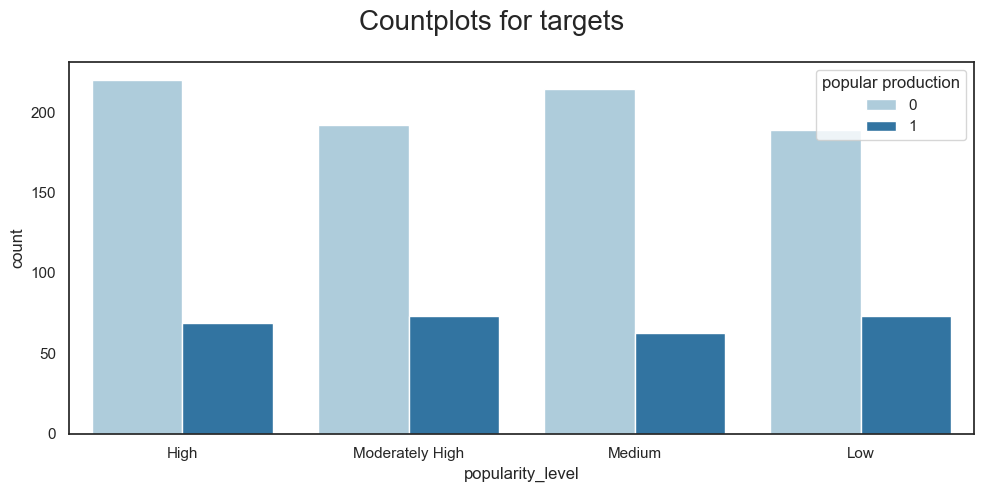

In [126]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular production"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

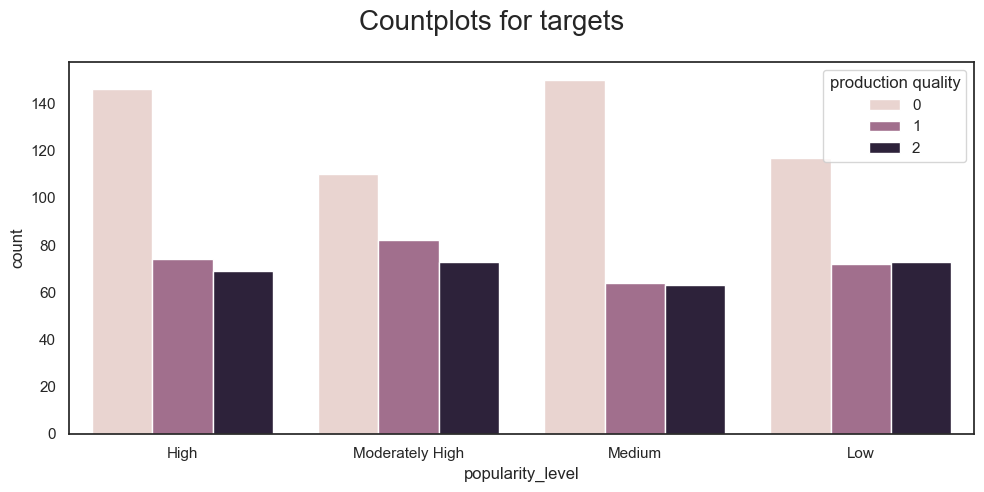

In [127]:
dataset["production quality"] = dataset["popular production"] + dataset["bigimpact production"]

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["production quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

- 2 indicates production company satisfy 2 criterias (high impact and produced many movies)
- 1 indicates production company satisfy 1 of the criteria
- 0 indicates production company does not satisfy any criteria of being a good production company

In [128]:
training_features.append("production quality")
training_features = [item for item in set(training_features)]
#num: [budget, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, popularity]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production
training_features

['production quality',
 'release_month',
 'num_goodcast',
 'overview length',
 'director_quality',
 'vote_count',
 'vote_average',
 'runtime',
 'popularity',
 'tagline length',
 'popularity_level',
 'budget_adj']

### feature extraction from keywords

#### one hot encode

In [129]:
OHE_keywords = onehotencode(dataset,"keywords")

In [130]:
OHE_keywords

17th century  1930s  1970s  3d  3d animation  adolescence  adoption  \
0                0      0      0   0             0            0         0   
1                0      0      0   0             0            0         0   
2                0      0      0   0             0            0         0   
3                0      0      0   0             0            0         0   
4                0      0      0   0             0            0         0   
...            ...    ...    ...  ..           ...          ...       ...   
1088             0      0      0   0             0            0         0   
1089             0      0      0   0             0            0         0   
1090             0      0      0   0             0            0         0   
1091             0      0      0   0             0            0         0   
1092             0      0      0   0             0            0         0   

      adoptive father  adoptive mother  adult as a child  adultery  adventure  \
0                   0                0                 0         0          0   
1                   0                0                 0         0          0   
2                   0                0                 0         0          0   
3                   0                0                 0         0          0   
4                   0                0                 0         0          0   
...               ...              ...               ...       ...        ...   
1088                0                0                 0         0          0   
1089                0                0                 0         0          0   
1090                0                0                 0         0          0   
1091                0                0                 0         0          0   
1092                0                0                 0         0          0   

      advice  aerial shot  afghanistan  africa  african american  \
0          0            0            0       0                 0   
1          0            0            0       0                 0   
2          0            0            0       0                 0   
3          0            0            0       0                 0   
4          0            0            0       0                 0   
...      ...          ...          ...     ...               ...   
1088       0            0            0       0                 0   
1089       0            0            0       0                 0   
1090       0            0            0       0                 0   
1091       0            0            0       0                 0   
1092       0            0            0       0                 0   

      aftercreditsstinger  afterlife  age difference  agent  agriculture  \
0                       0          0               0      0            0   
1                       0          0               0      0            0   
2                       0          0               0      0            0   
3                       0          0               0      0            0   
4                       0          0               0      0            0   
...                   ...        ...             ...    ...          ...   
1088                    0          0               0      0            0   
1089                    0          0               0      0            0   
1090                    0          0               0      0            0   
1091                    0          0               0      0            0   
1092                    0          0               0      0            0   

      aids  air force one  airplane  airport  airport security  alaska  \
0        0              0         0        0                 0       0   
1        0              0         0        0                 0       0   
2        0              0         0        0                 0       0   
3        0              0         0        0                 0       0   
4       

#### SelectKbest

In [131]:
# Perform feature selection using SelectKBest with chi-squared test
k = 1000 # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
selected_features = selector.fit_transform(OHE_keywords, dataset["popularity"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_keywords = OHE_keywords.columns[selected_indices]
selected_keywords = selected_keywords.tolist()

In [132]:
selected_keywords

['3d',
 '3d animation',
 'adolescence',
 'adoptive father',
 'adultery',
 'adventure',
 'advice',
 'afghanistan',
 'african american',
 'aftercreditsstinger',
 'age difference',
 'agent',
 'airport security',
 'alcohol',
 'algerian',
 'alice in wonderland',
 'alien',
 'alien attack',
 'alternate history',
 'american dream',
 'amnesia',
 'amusement park',
 'ancient egypt',
 'ancient rome',
 'android',
 'animal in title',
 'animation',
 'anti terror',
 'apocalypse',
 'apple computer',
 'aquarium',
 'archer',
 'arena',
 'argentina',
 'arms dealer',
 'arranged marriage',
 'artificial intelligence',
 'aspiring singer',
 'aspiring writer',
 'assault',
 'assistant',
 'asteroid',
 'astronaut',
 'auction',
 'australia',
 'automobile racing',
 'axe murder',
 'baby',
 'babysitter',
 'bachelor',
 'bachelorette party',
 'bad boss',
 'bad cop',
 'badger',
 'bail',
 'bail jumper',
 'bakery',
 'ballet',
 'balloon',
 'banishment',
 'bank',
 'bankrupt',
 'bar',
 'barcelona spain',
 'barrier ice',
 'base

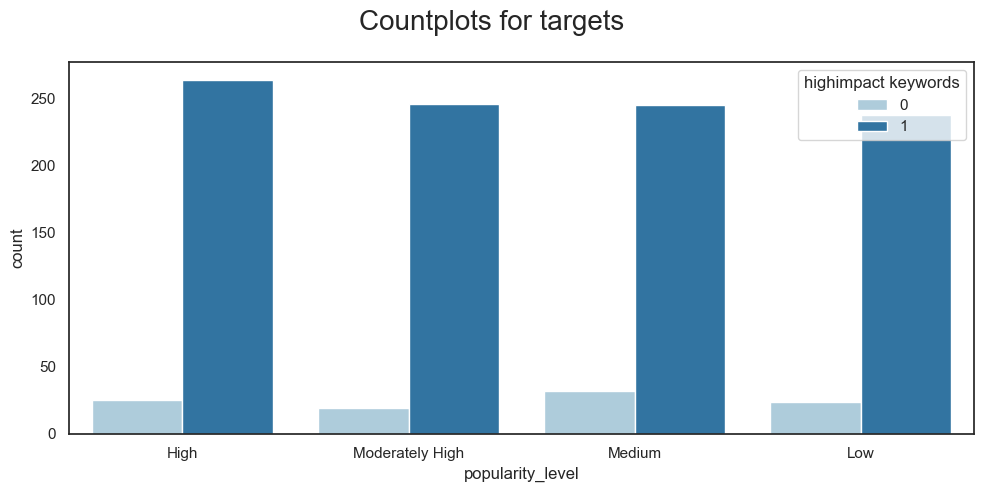

In [133]:
mlist = []
for keywords in selected_keywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["highimpact keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["highimpact keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

#### separate good and bad from Kbest

In [134]:
badkeywords = []
for keywords in dataset.loc[(dataset["highimpact keywords"] != 0)&(dataset["popularity_level"] == "Low")]["keywords"].values:
    keywords = keywords.split("|")
    badkeywords.append(keywords)
badkeywords = [item for sublist in badkeywords for item in sublist]
badkeywords = set(badkeywords)

badkeywords2 = {}
for keywords in selected_keywords:
    if keywords in badkeywords:
        index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
        badkeywords2[keywords] = dataset.iloc[index]["popularity"].mean()
        
final_badkeywords = []
for i,v in badkeywords2.items():
    if v < dataset["popularity"].mean():
        final_badkeywords.append(i)

In [135]:
goodkeywords = []
for keywords in dataset.loc[(dataset["highimpact keywords"] != 0)&(dataset["popularity_level"] == "High")]["keywords"].values:
    keywords = keywords.split("|")
    goodkeywords.append(keywords)
goodkeywords = [item for sublist in goodkeywords for item in sublist]
goodkeywords = set(goodkeywords)

goodkeywords2 = {}
for keywords in selected_keywords:
    if keywords in goodkeywords:
        index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
        goodkeywords2[keywords] = dataset.iloc[index]["popularity"].mean()
        
final_goodkeywords = []
for i,v in goodkeywords2.items():
    if v > dataset["popularity"].mean():
        final_goodkeywords.append(i)

In [136]:
final_badkeywords

['3d animation',
 'adolescence',
 'adultery',
 'adventure',
 'advice',
 'african american',
 'aftercreditsstinger',
 'age difference',
 'alcohol',
 'algerian',
 'american dream',
 'amusement park',
 'ancient rome',
 'animal in title',
 'anti terror',
 'apple computer',
 'aquarium',
 'argentina',
 'arranged marriage',
 'aspiring singer',
 'aspiring writer',
 'assault',
 'automobile racing',
 'axe murder',
 'baby',
 'babysitter',
 'bachelorette party',
 'bad cop',
 'bail',
 'ballet',
 'bankrupt',
 'bar',
 'baseball',
 'based on cartoon',
 'based on play',
 'based on stage musical',
 'based on true events',
 'based on video game',
 'battering',
 'beach',
 'beating',
 'becoming an adult',
 'beer',
 'best frends',
 'bicycle courier',
 'biohazard',
 'birthday',
 'black comedy',
 'black humor',
 'black people',
 'blaxploitation',
 'blood splatter',
 'blues',
 'book',
 'bosnian war of 1992-1995',
 'boxer',
 'boy',
 'brazil',
 'break-up',
 'british farce',
 'british overseas territory',
 'broke

In [137]:
final_goodkeywords

['3d',
 'adoptive father',
 'agent',
 'alice in wonderland',
 'alien',
 'alien attack',
 'alternate history',
 'amnesia',
 'ancient egypt',
 'android',
 'animation',
 'apocalypse',
 'archer',
 'arena',
 'arms dealer',
 'artificial intelligence',
 'assistant',
 'asteroid',
 'astronaut',
 'australia',
 'bad boss',
 'badger',
 'bakery',
 'balloon',
 'banishment',
 'bank',
 'barcelona spain',
 'barrier ice',
 'based on comic book',
 'based on graphic novel',
 'based on novel',
 'bdsm',
 'best friend',
 'betrayal',
 'bible',
 'black and white and color',
 'black and white scene',
 'blacksmith',
 'blue footed booby',
 'bone',
 'botanist',
 'bounty hunter',
 'broom',
 'brother brother relationship',
 'budapest',
 'burglar',
 'cage',
 'camcorder',
 'captain',
 'car',
 'car explosion',
 'car race',
 'cartoon',
 'caste system',
 'catastrophe',
 'central and south america',
 'chase',
 'cheating husband',
 'child hero',
 'child vampire',
 'chosen one',
 'christmas party',
 'cinema',
 'clock tower'

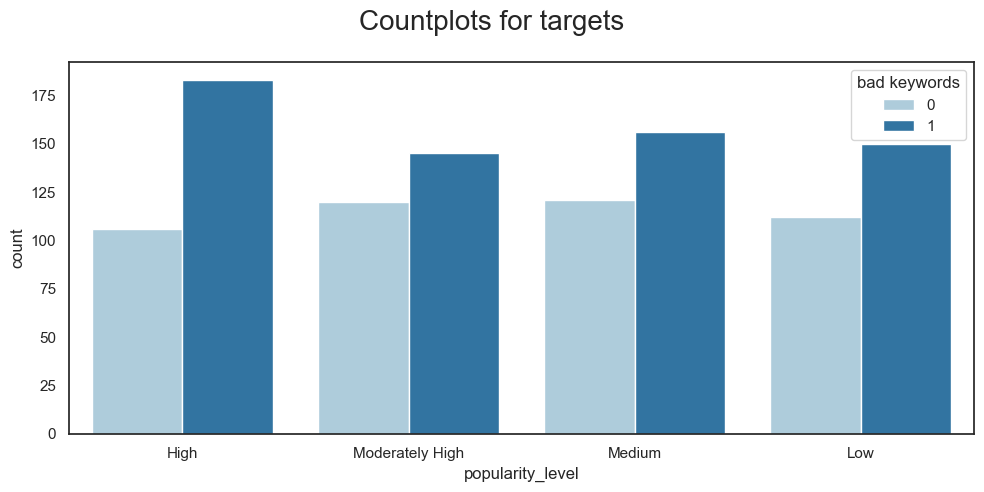

In [138]:
mlist = []
for keywords in final_badkeywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

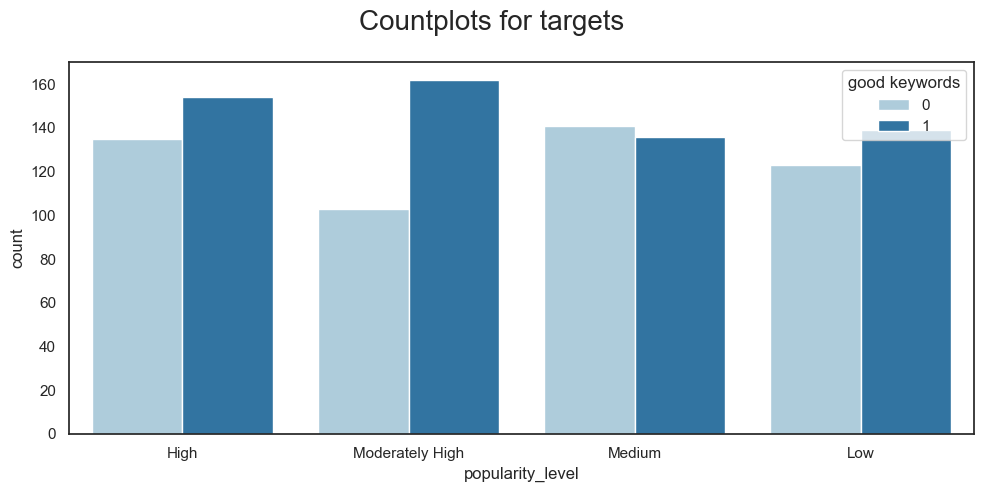

In [139]:
mlist = []
for keywords in final_goodkeywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["good keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["good keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [140]:
dataset["keyword quality"] = -dataset["bad keywords"]+dataset["good keywords"]

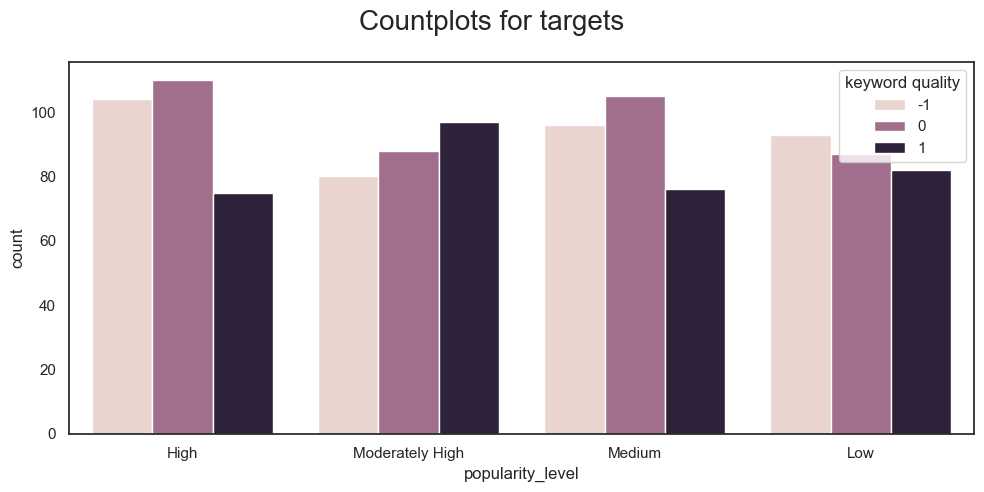

In [141]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["keyword quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [142]:
training_features.append("keyword quality")

#num: [budget, revenue, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords 
training_features

['production quality',
 'release_month',
 'num_goodcast',
 'overview length',
 'director_quality',
 'vote_count',
 'vote_average',
 'runtime',
 'popularity',
 'tagline length',
 'popularity_level',
 'budget_adj',
 'keyword quality']

#### feature extraction from genre

In [143]:
OHE_genre = onehotencode(dataset,"genres")

In [144]:
OHE_genre

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          1          1          0       0      0            0      0       0   
1          1          1          0       0      0            0      0       0   
2          0          1          0       0      0            0      1       0   
3          1          1          0       0      0            0      0       0   
4          0          1          0       0      0            0      0       0   
...      ...        ...        ...     ...    ...          ...    ...     ...   
1088       0          0          0       0      0            0      1       0   
1089       0          0          0       0      0            1      0       0   
1090       0          0          0       1      0            0      0       0   
1091       0          0          0       1      0            0      1       0   
1092       0          0          0       0      0            1      0       0   

      Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0           0        0        0       0      0        0        0   
1           0        0        0       0      0        0        0   
2           0        0        0       0      0        0        0   
3           0        0        0       0      0        0        0   
4           0        0        0       0      0        0        0   
...       ...      ...      ...     ...    ...      ...      ...   
1088        0        0        0       0      0        0        0   
1089        0        0        0       0      1        0        0   
1090        0        0        0       0      0        0        0   
1091        0        0        0       0      0        0        0   
1092        0        0        0       0      0        0        0   

      Science Fiction  Thriller  War  Western  
0                   1         1    0        0  
1                   1         1    0        0  
2                   1         0    0        0  
3                   1         0    0        0  
4                   1         1    0        0  
...               ...       ...  ...      ...  
1088                0         0    0        0  
1089                0         0    0        0  
1090                0         0    0        0  
1091                0         0    0        0  
1092                0         0    0        0  

[1093 rows x 19 columns]

#### SelectKbest

In [145]:
# Perform feature selection using SelectKBest with chi-squared test
k = 4 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_genre, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_genre = OHE_genre.columns[selected_indices]
selected_genre = selected_genre.tolist()

In [146]:
selected_genre

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [147]:
mlist = []
for genre in selected_genre:
    index = OHE_genre.loc[OHE_genre[genre] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]
dataset["highimpact genre"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

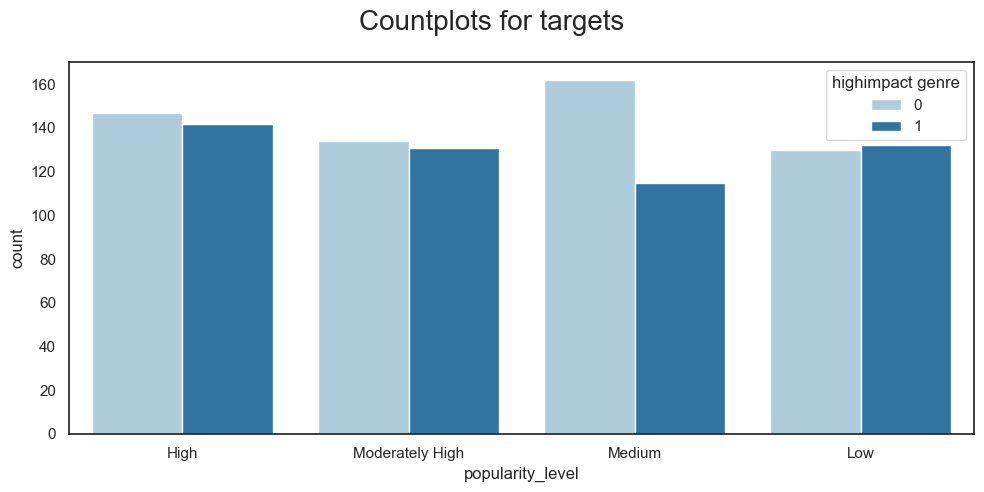

In [148]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["highimpact genre"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the list of selected genre of 4 out of 19 genres seems to be popular, we will directly use this as the feature

In [149]:
training_features.append("highimpact genre")
training_features = [item for item in set(training_features)]
#num: [budget_adj, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality, popularity, popularity_level]
#cat: [release month, director_quality, highimpact genre]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords, selected_genre 
training_features

['production quality',
 'release_month',
 'num_goodcast',
 'overview length',
 'director_quality',
 'vote_count',
 'vote_average',
 'runtime',
 'keyword quality',
 'popularity',
 'tagline length',
 'highimpact genre',
 'popularity_level',
 'budget_adj']

## Preprocessing

In the previous section, we have explored the data and found a few ways to extract the features from raw data. In this section, we will need to create a pipeline to transform the features for both training and test datasets

In [150]:
def get_release_month(dataset):
    dataset['release_date'] = pd.to_datetime(dataset['release_date'])
    dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)
    return dataset
def get_length(dataset):
    dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
    dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
    dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))
    return dataset
#=======================================================
def calc_accum(listitem, x):
    i = 0
    for item in listitem:
        if item in x:
            i+=1
    return i
def get_num_goodcast(final_goodcast, dataset):
    dataset["num_goodcast"] = dataset["cast"].apply(lambda x : calc_accum(final_goodcast, x))
    return dataset
#=======================================================
def calc(listitem, x):
    i = 0
    for item in listitem:
        if item in x:
            i+=1
    if i > 0:
        return 1
    else:
        return 0
def get_director_quality(final_baddirector, inexperienced_director, dataset):
    dataset["bad director"] = dataset["director"].apply(lambda x : calc(final_baddirector, x))
    dataset["inexperienced_director"] = dataset["director"].apply(lambda x : calc(inexperienced_director, x))
    dataset["director_quality"] = ((dataset["inexperienced_director"] + dataset["bad director"])/2).apply(lambda x: int(x+0.5))
    return dataset
def get_production_quality(selected_production, popular_production, dataset):
    dataset["bigimpact production"] = dataset["production_companies"].apply(lambda x : calc(selected_production, x))
    dataset["popular production"] = dataset["production_companies"].apply(lambda x : calc(popular_production, x))
    dataset["production quality"] = dataset["popular production"] + dataset["bigimpact production"]
    return dataset
def get_keyword_quality(final_badkeywords, final_goodkeywords, dataset):
    dataset["bad keywords"] = dataset["keywords"].apply(lambda x : calc(final_badkeywords, x))
    dataset["good keywords"] = dataset["keywords"].apply(lambda x : calc(final_goodkeywords, x))
    dataset["keyword quality"] = -dataset["bad keywords"]+dataset["good keywords"]
    return dataset
def get_highimpact_genre(selected_genre, dataset):
    dataset["highimpact genre"] = dataset["genres"].apply(lambda x : calc(selected_genre, x))
    return dataset

def getall(dataset1, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre):
    dataset = dataset1.copy()
    dataset = get_release_month(dataset)
    dataset = get_length(dataset)
    dataset = get_num_goodcast(final_goodcast, dataset)
    dataset = get_director_quality(final_baddirector, inexperienced_director, dataset)
    dataset = get_production_quality(selected_production, popular_production, dataset)
    dataset = get_keyword_quality(final_badkeywords, final_goodkeywords, dataset)
    dataset = get_highimpact_genre(selected_genre, dataset)
    return dataset

In [151]:
def catpop(x):
    if x == "Low":
        return 0
    elif x == "Medium":
        return 1
    elif x == "Moderately High":
        return 2
    elif x == "High":
        return 3

In [152]:
dataset_train["popularity_level_num"] = dataset_train["popularity_level"].apply(lambda x : catpop(x))
dataset_test["popularity_level_num"] = dataset_test["popularity_level"].apply(lambda x : catpop(x))

This set of training features and target feature tries to predict profit of a given movie 

In [153]:
#num: [budget_adj, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality, popularity, popularity_level]
#cat: [release month, director_quality, highimpact genre]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords, selected_genre 

training_features = [
                     'budget_adj',
#                      'revenue_adj',
                     'runtime',
                     'vote_count',
                     'vote_average',
#                      'profit',
                     'release_month',
                     'tagline length',
                     'overview length',
                     'num_goodcast',
                     'director_quality',
                     'production quality',
                     'keyword quality',
                     'highimpact genre',
                     'popularity_level_num',
#                      'popularity'
                    ]

target_feature = [
#                   'profit_groups',
                  'profitability'
                 ]


num_cols = [
            'budget_adj',
#             'revenue_adj',
            "runtime", 
            "vote_count", 
            "vote_average", 
            "tagline length", 
            "overview length", 
            "num_goodcast", 
            "production quality", 
            "keyword quality",
            "popularity_level_num",
#             "popularity"
           ]
cat_cols = [
            "release_month",
            "director_quality", 
            "highimpact genre"
           ]

In [154]:
# pathsegment = "/cpiestage/jtlau/DS_project/test/"
# dataset = pd.read_csv(f'{pathsegment}/TMBD Movie Dataset.csv')
# dataset = getall(dataset, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre)

In [155]:
dataset_train_preprocessed = getall(dataset_train, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre)
dataset_train_preprocessed = dataset_train_preprocessed.reset_index(drop = True)
dataset_test_preprocessed = getall(dataset_test, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre)
dataset_test_preprocessed = dataset_test_preprocessed.reset_index(drop = True)

In [156]:
dataset_train_preprocessed.to_csv("dataset_train_"+str(test_ratio*100)+".csv")
dataset_test_preprocessed.to_csv("dataset_test_"+str(test_ratio*100)+".csv")